In [1]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

In [3]:
application_df = pd.read_csv('application_data.csv')
application_df.head(5)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [4]:
application_df.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  \
count      307511.000000    307511.000000  104582.000000  307511.000000   
mean        -4986.120328     -2994.202373      12.061091       0.999997   
std          3522.886321      1509.450419      11.944812       0.001803   
min        -24672.000000     -7197.000000       0.000000       0.000000   
25%         -7479.500000     -4299.000000       5.000000       1.000000   
50%         -4504.000000     -3254.000000       9.000000       1.000000   
75%         -2010.000000     -1720.000000      15.000000       1.000000   
max             0.000000         0.000000      91.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   307511.000000    307511.000000     307511.000000  307511.000000   
mean         0.819889         0.199368          0.998133       0.281066   
std          0.384280         0.399526          0.043164       0.449521   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307511.000000    307509.000000         307511.000000   
mean        0.056720         2.152665              2.052463   
std         0.231307         0.910682              0.509034   
min         0.000000         1.000000              1.000000   
25%         0.000000         2.000000              2.000000   
50%         0.000000         2.000000              2.000000   
75%         0.000000         3.000000              2.000000   
max         1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                307511.000000            307511.000000   
mean                      2.031521                12.063419   
std                       0.502737                 3.265832   
min                       1.000000                 0.000000   
25%                       

In [5]:
application_df.columns.values

array(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3',

In [6]:
application_df.count()

SK_ID_CURR                      307511
TARGET                          307511
NAME_CONTRACT_TYPE              307511
CODE_GENDER                     307511
FLAG_OWN_CAR                    307511
FLAG_OWN_REALTY                 307511
CNT_CHILDREN                    307511
AMT_INCOME_TOTAL                307511
AMT_CREDIT                      307511
AMT_ANNUITY                     307499
AMT_GOODS_PRICE                 307233
NAME_TYPE_SUITE                 306219
NAME_INCOME_TYPE                307511
NAME_EDUCATION_TYPE             307511
NAME_FAMILY_STATUS              307511
NAME_HOUSING_TYPE               307511
REGION_POPULATION_RELATIVE      307511
DAYS_BIRTH                      307511
DAYS_EMPLOYED                   307511
DAYS_REGISTRATION               307511
DAYS_ID_PUBLISH                 307511
OWN_CAR_AGE                     104582
FLAG_MOBIL                      307511
FLAG_EMP_PHONE                  307511
FLAG_WORK_PHONE                 307511
FLAG_CONT_MOBILE         

In [7]:
len(application_df)

307511

In [8]:
#Find the % of null values in each column
100*application_df.isnull().mean().sort_values(ascending=False).head(70)

COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAPARTMENTS_MEDI           68.354953
FLOORSMIN_AVG                   67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_MEDI                  67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_MODE                66.497784
YEARS_BUILD_AVG                 66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MEDI                   59.376738
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

In [9]:
application_df.shape

(307511, 122)

In [10]:
#Number of columns having less than 50% missing values. These columns are retained and columns where missing values are more than 50% dropped in next step
#Reason: 
len(application_df.columns.values[100*application_df.isnull().mean()<50])

81

In [11]:
#writing the code to only keep columns having less than 50% (cutoff) null values
#Assumption: Cutoff of 50%
cut_off=50
cols_to_drop = application_df.columns[100*application_df.isnull().mean()>cut_off]
print(cols_to_drop)
application_df = application_df.drop(cols_to_drop, axis=1)

Index(['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG',
       'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG',
       'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG',
       'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMIN_MODE',
       'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI',
       'BASEMENTAREA_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI',
       'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI',
       'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI',
       'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE',
       'WALLSMATERIAL_MODE'],
      dtype='object')


In [12]:
application_df.shape

(307511, 81)

In [13]:
100*application_df.isnull().mean().sort_values(ascending=False).head(70)

FLOORSMAX_AVG                   49.760822
FLOORSMAX_MODE                  49.760822
FLOORSMAX_MEDI                  49.760822
YEARS_BEGINEXPLUATATION_AVG     48.781019
YEARS_BEGINEXPLUATATION_MODE    48.781019
YEARS_BEGINEXPLUATATION_MEDI    48.781019
TOTALAREA_MODE                  48.268517
EMERGENCYSTATE_MODE             47.398304
OCCUPATION_TYPE                 31.345545
EXT_SOURCE_3                    19.825307
AMT_REQ_CREDIT_BUREAU_YEAR      13.501631
AMT_REQ_CREDIT_BUREAU_HOUR      13.501631
AMT_REQ_CREDIT_BUREAU_DAY       13.501631
AMT_REQ_CREDIT_BUREAU_WEEK      13.501631
AMT_REQ_CREDIT_BUREAU_MON       13.501631
AMT_REQ_CREDIT_BUREAU_QRT       13.501631
NAME_TYPE_SUITE                  0.420148
DEF_30_CNT_SOCIAL_CIRCLE         0.332021
OBS_60_CNT_SOCIAL_CIRCLE         0.332021
DEF_60_CNT_SOCIAL_CIRCLE         0.332021
OBS_30_CNT_SOCIAL_CIRCLE         0.332021
EXT_SOURCE_2                     0.214626
AMT_GOODS_PRICE                  0.090403
AMT_ANNUITY                      0

In [14]:
#Numerical columns
num_cols = application_df.describe().columns
print(list(num_cols))

['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG', 'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE', 'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MEDI', 'TOTALAREA_MODE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DO

In [15]:
#Categorical Columns
cat_cols_set = set(application_df.columns) - set(application_df.describe().columns)
cat_cols = list(cat_cols_set)
print(cat_cols)

['NAME_INCOME_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'OCCUPATION_TYPE', 'NAME_TYPE_SUITE', 'NAME_HOUSING_TYPE', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'EMERGENCYSTATE_MODE', 'CODE_GENDER', 'NAME_CONTRACT_TYPE', 'NAME_FAMILY_STATUS', 'NAME_EDUCATION_TYPE', 'ORGANIZATION_TYPE']


In [16]:
application_df.FLOORSMAX_AVG.describe()

count    154491.000000
mean          0.226282
std           0.144641
min           0.000000
25%           0.166700
50%           0.166700
75%           0.333300
max           1.000000
Name: FLOORSMAX_AVG, dtype: float64

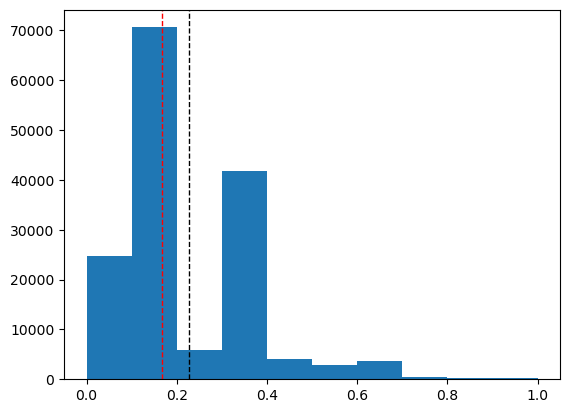

In [17]:
#Plot a histogram of FLOORSMAX_AVG and mark the mean and median
#Histogram helps to gauge the spread of quantitative value
#Whenever their are outliers in the data use median else you can use mean
plt.hist(application_df.FLOORSMAX_AVG)
plt.axvline(application_df.FLOORSMAX_AVG.mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(application_df.FLOORSMAX_AVG.median(), color='r', linestyle='dashed', linewidth=1)
plt.show()

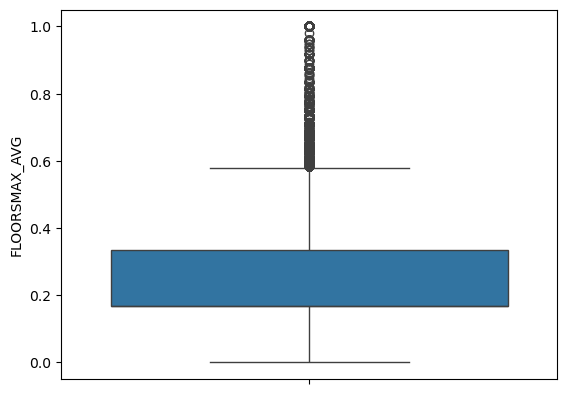

In [18]:
#Checking the outliers using the boxplot
sns.boxplot(y=application_df["FLOORSMAX_AVG"])
plt.show()

In [19]:
#As there are outliers in the FLOORSMAX_AVG, replacing the missing values with median
application_df["FLOORSMAX_AVG"].fillna(application_df.FLOORSMAX_AVG.median(),inplace=True)

In [20]:
application_df["FLOORSMAX_AVG"].isnull().sum()

0

In [21]:
application_df["FLOORSMAX_MODE"].describe()

count    154491.000000
mean          0.222315
std           0.143709
min           0.000000
25%           0.166700
50%           0.166700
75%           0.333300
max           1.000000
Name: FLOORSMAX_MODE, dtype: float64

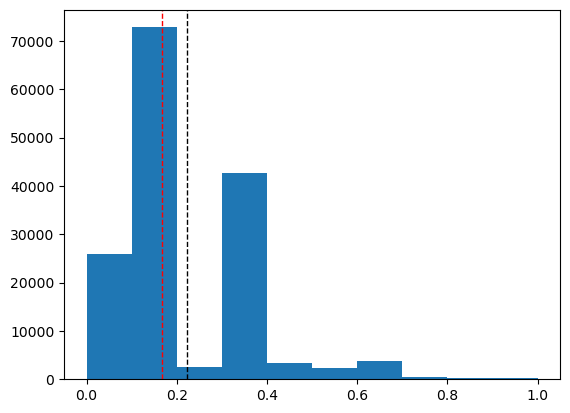

In [22]:
#Plot a histogram of FLOORSMAX_MODE and mark the mean and median
#Histogram helps to gauge the spread of quantitative value
#Whenever their are outliers in the data use median else you can use mean
plt.hist(application_df.FLOORSMAX_MODE)
plt.axvline(application_df.FLOORSMAX_MODE.mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(application_df.FLOORSMAX_MODE.median(), color='r', linestyle='dashed', linewidth=1)
plt.show()

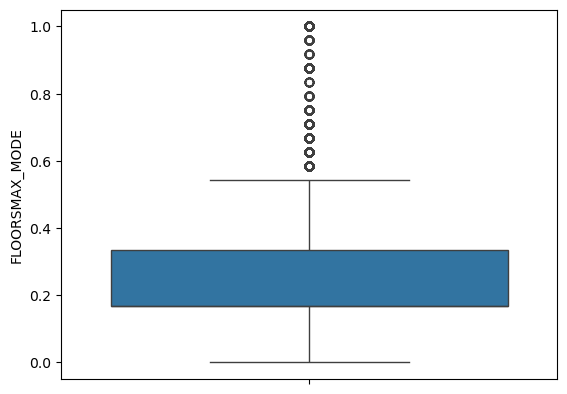

In [23]:
#Checking the outliers using the boxplot
sns.boxplot(y=application_df["FLOORSMAX_MODE"])
plt.show()

In [24]:
#As there are outliers in the FLOORSMAX_MODE, replacing the missing values with median
application_df["FLOORSMAX_MODE"].fillna(application_df.FLOORSMAX_MODE.median(),inplace=True)

In [25]:
application_df["FLOORSMAX_MODE"].isnull().sum()

0

In [26]:
application_df["FLOORSMAX_MEDI"].describe()

count    154491.000000
mean          0.225897
std           0.145067
min           0.000000
25%           0.166700
50%           0.166700
75%           0.333300
max           1.000000
Name: FLOORSMAX_MEDI, dtype: float64

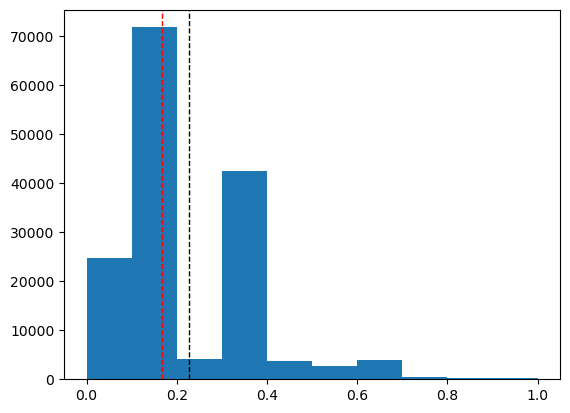

In [27]:
#Plot a histogram of FLOORSMAX_MEDI and mark the mean and median
#Histogram helps to gauge the spread of quantitative value
#Whenever their are outliers in the data use median else you can use mean
plt.hist(application_df.FLOORSMAX_MEDI)
plt.axvline(application_df.FLOORSMAX_MEDI.mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(application_df.FLOORSMAX_MEDI.median(), color='r', linestyle='dashed', linewidth=1)
plt.show()

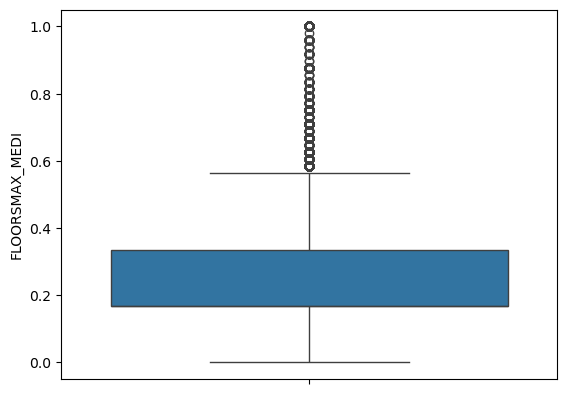

In [28]:
#Checking the outliers using the boxplot
sns.boxplot(y=application_df["FLOORSMAX_MEDI"])
plt.show()

In [29]:
#As there are outliers in the FLOORSMAX_MEDI, replacing the missing values with median
application_df["FLOORSMAX_MEDI"].fillna(application_df.FLOORSMAX_MEDI.median(),inplace=True)

In [30]:
application_df["FLOORSMAX_MEDI"].isnull().sum()

0

In [31]:
application_df["YEARS_BEGINEXPLUATATION_AVG"].describe()

count    157504.000000
mean          0.977735
std           0.059223
min           0.000000
25%           0.976700
50%           0.981600
75%           0.986600
max           1.000000
Name: YEARS_BEGINEXPLUATATION_AVG, dtype: float64

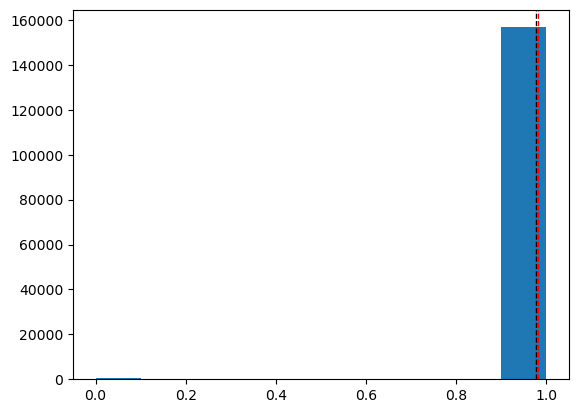

In [32]:
#Plot a histogram of YEARS_BEGINEXPLUATATION_AVG and mark the mean and median
#Histogram helps to gauge the spread of quantitative value
#Whenever their are outliers in the data use median else you can use mean
plt.hist(application_df.YEARS_BEGINEXPLUATATION_AVG)
plt.axvline(application_df.YEARS_BEGINEXPLUATATION_AVG.mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(application_df.YEARS_BEGINEXPLUATATION_AVG.median(), color='r', linestyle='dashed', linewidth=1)
plt.show()

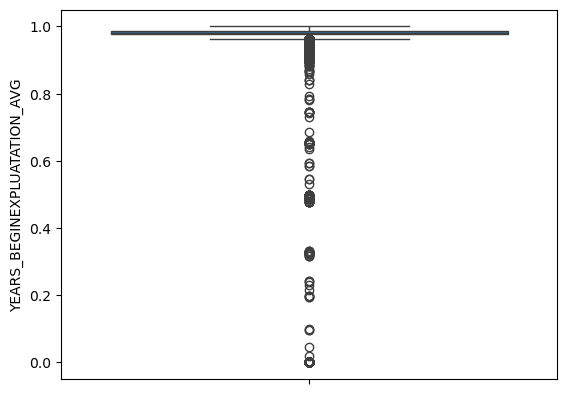

In [33]:
#Checking the outliers using the boxplot
sns.boxplot(y=application_df["YEARS_BEGINEXPLUATATION_AVG"])
plt.show()

In [34]:
#As there are outliers in the YEARS_BEGINEXPLUATATION_AVG, replacing the missing values with median
application_df["YEARS_BEGINEXPLUATATION_AVG"].fillna(application_df.YEARS_BEGINEXPLUATATION_AVG.median(),inplace=True)

In [35]:
application_df["YEARS_BEGINEXPLUATATION_AVG"].isnull().sum()

0

In [36]:
application_df["YEARS_BEGINEXPLUATATION_MEDI"].describe()

count    157504.000000
mean          0.977752
std           0.059897
min           0.000000
25%           0.976700
50%           0.981600
75%           0.986600
max           1.000000
Name: YEARS_BEGINEXPLUATATION_MEDI, dtype: float64

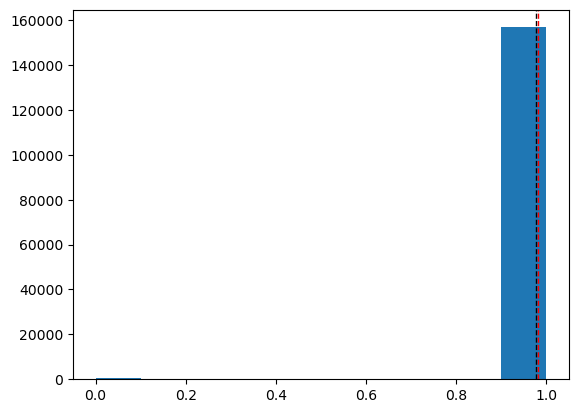

In [37]:
#Plot a histogram of YEARS_BEGINEXPLUATATION_MEDI and mark the mean and median
#Histogram helps to gauge the spread of quantitative value
#Whenever their are outliers in the data use median else you can use mean
plt.hist(application_df.YEARS_BEGINEXPLUATATION_MEDI)
plt.axvline(application_df.YEARS_BEGINEXPLUATATION_MEDI.mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(application_df.YEARS_BEGINEXPLUATATION_MEDI.median(), color='r', linestyle='dashed', linewidth=1)
plt.show()

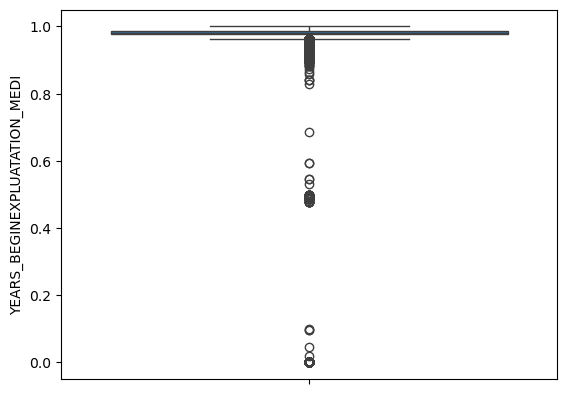

In [38]:
#Checking the outliers using the boxplot
sns.boxplot(y=application_df["YEARS_BEGINEXPLUATATION_MEDI"])
plt.show()

In [39]:
#As there are outliers in the YEARS_BEGINEXPLUATATION_MEDI, replacing the missing values with median
application_df["YEARS_BEGINEXPLUATATION_MEDI"].fillna(application_df.YEARS_BEGINEXPLUATATION_MEDI.median(),inplace=True)

In [40]:
application_df["YEARS_BEGINEXPLUATATION_MEDI"].isnull().sum()

0

In [41]:
application_df["YEARS_BEGINEXPLUATATION_MODE"].describe()

count    157504.000000
mean          0.977065
std           0.064575
min           0.000000
25%           0.976700
50%           0.981600
75%           0.986600
max           1.000000
Name: YEARS_BEGINEXPLUATATION_MODE, dtype: float64

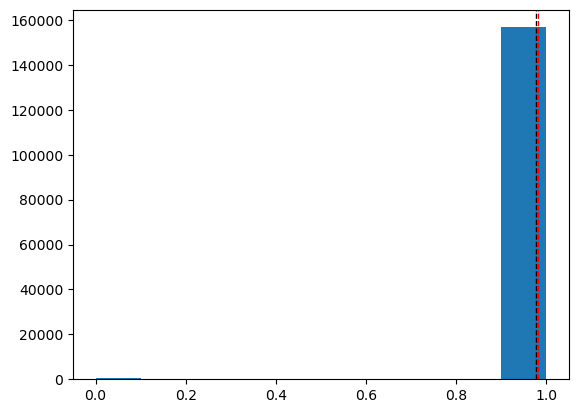

In [42]:
#Plot a histogram of YEARS_BEGINEXPLUATATION_MODE and mark the mean and median
#Histogram helps to gauge the spread of quantitative value
#Whenever their are outliers in the data use median else you can use mean
plt.hist(application_df.YEARS_BEGINEXPLUATATION_MODE)
plt.axvline(application_df.YEARS_BEGINEXPLUATATION_MODE.mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(application_df.YEARS_BEGINEXPLUATATION_MODE.median(), color='r', linestyle='dashed', linewidth=1)
plt.show()

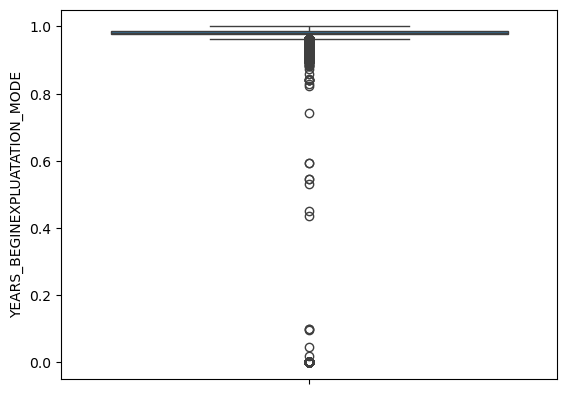

In [43]:
#Checking the outliers using the boxplot
sns.boxplot(y=application_df["YEARS_BEGINEXPLUATATION_MODE"])
plt.show()

In [44]:
#As there are outliers in the YEARS_BEGINEXPLUATATION_MODE, replacing the missing values with median
application_df["YEARS_BEGINEXPLUATATION_MODE"].fillna(application_df.YEARS_BEGINEXPLUATATION_MODE.median(),inplace=True)

In [45]:
application_df["YEARS_BEGINEXPLUATATION_MODE"].isnull().sum()

0

In [46]:
application_df["TOTALAREA_MODE"].describe()

count    159080.000000
mean          0.102547
std           0.107462
min           0.000000
25%           0.041200
50%           0.068800
75%           0.127600
max           1.000000
Name: TOTALAREA_MODE, dtype: float64

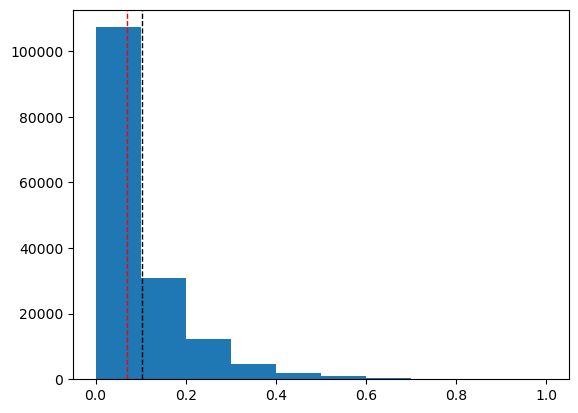

In [47]:
#Plot a histogram of TOTALAREA_MODE and mark the mean and median
#Histogram helps to gauge the spread of quantitative value
#Whenever their are outliers in the data use median else you can use mean
plt.hist(application_df.TOTALAREA_MODE)
plt.axvline(application_df.TOTALAREA_MODE.mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(application_df.TOTALAREA_MODE.median(), color='r', linestyle='dashed', linewidth=1)
plt.show()

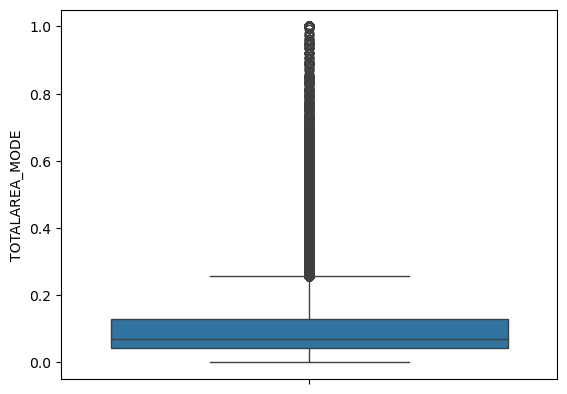

In [48]:
#Checking the outliers using the boxplot
sns.boxplot(y=application_df["TOTALAREA_MODE"])
plt.show()

In [49]:
#As there are outliers in the TOTALAREA_MODE, replacing the missing values with median
application_df["TOTALAREA_MODE"].fillna(application_df.TOTALAREA_MODE.median(),inplace=True)

In [50]:
application_df["TOTALAREA_MODE"].isnull().sum()

0

In [51]:
application_df["EXT_SOURCE_3"].describe()

count    246546.000000
mean          0.510853
std           0.194844
min           0.000527
25%           0.370650
50%           0.535276
75%           0.669057
max           0.896010
Name: EXT_SOURCE_3, dtype: float64

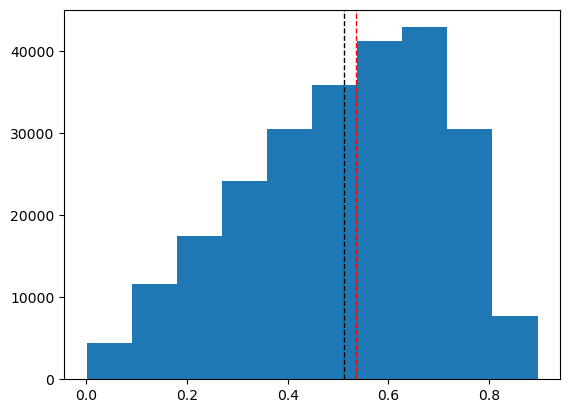

In [52]:
#Plot a histogram of EXT_SOURCE_3 and mark the mean and median
#Histogram helps to gauge the spread of quantitative value
#Whenever their are outliers in the data use median else you can use mean
plt.hist(application_df.EXT_SOURCE_3)
plt.axvline(application_df.EXT_SOURCE_3.mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(application_df.EXT_SOURCE_3.median(), color='r', linestyle='dashed', linewidth=1)
plt.show()

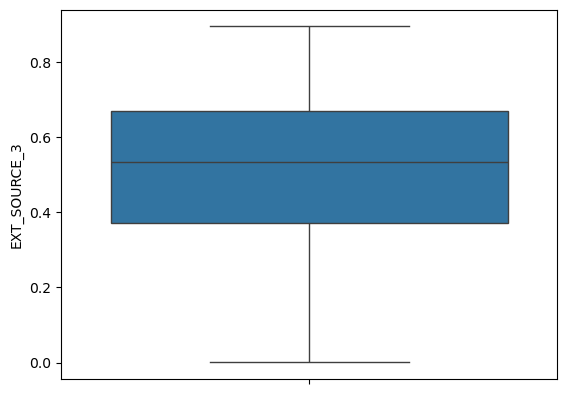

In [53]:
#Checking the outliers using the boxplot
sns.boxplot(y=application_df["EXT_SOURCE_3"])
plt.show()

In [54]:
#As there are no outliers in the EXT_SOURCE_3, and mean and median values are nearly close replacing the missing values with mean
application_df["EXT_SOURCE_3"].fillna(application_df.EXT_SOURCE_3.mean(),inplace=True)

In [55]:
application_df["EXT_SOURCE_3"].isnull().sum()

0

In [56]:
application_df["AMT_REQ_CREDIT_BUREAU_YEAR"].value_counts()

#AMT_REQ_CREDIT_BUREAU columns refers to the Number of enquiries to Credit Bureau in previous hour, day etc which is an important indicator. Hence NaN may either
#signify applicant has not got any loans or some server issues. So would retain NaN values for all AMT_REQ_CREDIT_BUREAU columns


AMT_REQ_CREDIT_BUREAU_YEAR
0.0     71801
1.0     63405
2.0     50192
3.0     33628
4.0     20714
5.0     12052
6.0      6967
7.0      3869
8.0      2127
9.0      1096
11.0       31
12.0       30
10.0       22
13.0       19
14.0       10
17.0        7
15.0        6
19.0        4
18.0        4
16.0        3
25.0        1
23.0        1
22.0        1
21.0        1
20.0        1
Name: count, dtype: int64

In [57]:
application_df["AMT_REQ_CREDIT_BUREAU_HOUR"].value_counts()

AMT_REQ_CREDIT_BUREAU_HOUR
0.0    264366
1.0      1560
2.0        56
3.0         9
4.0         1
Name: count, dtype: int64

In [58]:
application_df["AMT_REQ_CREDIT_BUREAU_DAY"].value_counts()

AMT_REQ_CREDIT_BUREAU_DAY
0.0    264503
1.0      1292
2.0       106
3.0        45
4.0        26
5.0         9
6.0         8
9.0         2
8.0         1
Name: count, dtype: int64

In [59]:
application_df["AMT_REQ_CREDIT_BUREAU_WEEK"].value_counts()

AMT_REQ_CREDIT_BUREAU_WEEK
0.0    257456
1.0      8208
2.0       199
3.0        58
4.0        34
6.0        20
5.0        10
8.0         5
7.0         2
Name: count, dtype: int64

In [60]:
application_df["AMT_REQ_CREDIT_BUREAU_MON"].value_counts()

AMT_REQ_CREDIT_BUREAU_MON
0.0     222233
1.0      33147
2.0       5386
3.0       1991
4.0       1076
5.0        602
6.0        343
7.0        298
9.0        206
8.0        185
10.0       132
11.0       119
12.0        77
13.0        72
14.0        40
15.0        35
16.0        23
17.0        14
18.0         6
19.0         3
24.0         1
23.0         1
27.0         1
22.0         1
Name: count, dtype: int64

In [61]:
application_df["AMT_REQ_CREDIT_BUREAU_QRT"].value_counts()

AMT_REQ_CREDIT_BUREAU_QRT
0.0      215417
1.0       33862
2.0       14412
3.0        1717
4.0         476
5.0          64
6.0          28
8.0           7
7.0           7
261.0         1
19.0          1
Name: count, dtype: int64

In [62]:
#EMERGENCYSTATE_MODE is a categorical column and missing values can be replaced with mode
application_df["EMERGENCYSTATE_MODE"].value_counts()

EMERGENCYSTATE_MODE
No     159428
Yes      2328
Name: count, dtype: int64

In [63]:
application_df["EMERGENCYSTATE_MODE"].mode()[0]

'No'

In [64]:
application_df["EMERGENCYSTATE_MODE"].fillna(application_df.EMERGENCYSTATE_MODE.mode()[0],inplace=True)

In [65]:
application_df["EMERGENCYSTATE_MODE"].isnull().sum()

0

In [66]:
#We can leave 'OCCUPATION_TYPE' with null values as probablity that may not be a mandatory field in application and the applicant has not filled it.
application_df["OCCUPATION_TYPE"].value_counts()

OCCUPATION_TYPE
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: count, dtype: int64

In [67]:
100*application_df.isnull().mean().sort_values(ascending=False).head(70)

OCCUPATION_TYPE                 31.345545
AMT_REQ_CREDIT_BUREAU_YEAR      13.501631
AMT_REQ_CREDIT_BUREAU_QRT       13.501631
AMT_REQ_CREDIT_BUREAU_MON       13.501631
AMT_REQ_CREDIT_BUREAU_WEEK      13.501631
AMT_REQ_CREDIT_BUREAU_DAY       13.501631
AMT_REQ_CREDIT_BUREAU_HOUR      13.501631
NAME_TYPE_SUITE                  0.420148
DEF_60_CNT_SOCIAL_CIRCLE         0.332021
OBS_60_CNT_SOCIAL_CIRCLE         0.332021
DEF_30_CNT_SOCIAL_CIRCLE         0.332021
OBS_30_CNT_SOCIAL_CIRCLE         0.332021
EXT_SOURCE_2                     0.214626
AMT_GOODS_PRICE                  0.090403
AMT_ANNUITY                      0.003902
CNT_FAM_MEMBERS                  0.000650
DAYS_LAST_PHONE_CHANGE           0.000325
NAME_EDUCATION_TYPE              0.000000
FLAG_DOCUMENT_5                  0.000000
FLAG_DOCUMENT_9                  0.000000
FLAG_DOCUMENT_8                  0.000000
FLAG_DOCUMENT_7                  0.000000
FLAG_DOCUMENT_6                  0.000000
FLAG_DOCUMENT_3                  0

In [68]:
#NAME_TYPE_SUITE is a categorical column and missing values can be replaced with mode
application_df["NAME_TYPE_SUITE"].value_counts()

NAME_TYPE_SUITE
Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: count, dtype: int64

In [69]:
application_df["NAME_TYPE_SUITE"].mode()[0]

'Unaccompanied'

In [70]:
application_df["NAME_TYPE_SUITE"].fillna(application_df.NAME_TYPE_SUITE.mode()[0],inplace=True)

In [71]:
application_df["OBS_30_CNT_SOCIAL_CIRCLE"].describe()
#How many observation of client's social surroundings with observable 30 DPD (days past due) default, can be left null

count    306490.000000
mean          1.422245
std           2.400989
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         348.000000
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64

In [72]:
application_df["DEF_60_CNT_SOCIAL_CIRCLE"].describe()
# can be left null

count    306490.000000
mean          0.100049
std           0.362291
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          24.000000
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: float64

In [73]:
application_df["OBS_60_CNT_SOCIAL_CIRCLE"].describe()
# can be left null

count    306490.000000
mean          1.405292
std           2.379803
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         344.000000
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64

In [74]:
application_df["DEF_30_CNT_SOCIAL_CIRCLE"].describe()
# can be left null

count    306490.000000
mean          0.143421
std           0.446698
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          34.000000
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64

In [75]:
application_df["EXT_SOURCE_2"].describe()

count    3.068510e+05
mean     5.143927e-01
std      1.910602e-01
min      8.173617e-08
25%      3.924574e-01
50%      5.659614e-01
75%      6.636171e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64

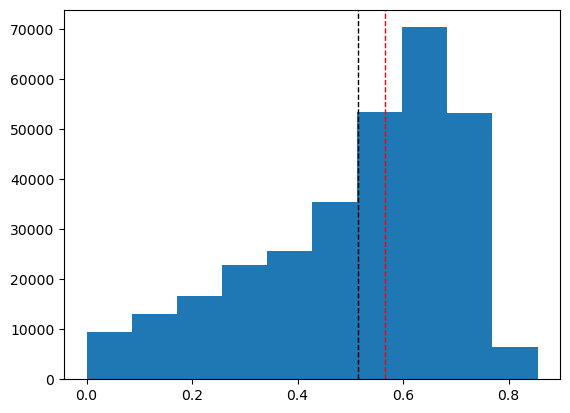

In [76]:
#Plot a histogram of FLOORSMAX_AVG and mark the mean and median
#Histogram helps to gauge the spread of quantitative value
#Whenever their are outliers in the data use median else you can use mean
plt.hist(application_df.EXT_SOURCE_2)
plt.axvline(application_df.EXT_SOURCE_2.mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(application_df.EXT_SOURCE_2.median(), color='r', linestyle='dashed', linewidth=1)
plt.show()

In [78]:
#As there are no outliers in the EXT_SOURCE_2, and mean and median values are nearly equal, replacing the missing values with mean
application_df["EXT_SOURCE_2"].fillna(application_df.EXT_SOURCE_2.mean,inplace=True)

In [ ]:
application_df["EXT_SOURCE_2"].isnull().sum()

In [81]:
application_df[application_df['AMT_GOODS_PRICE'].isnull()].head(7)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
724       100837       0    Revolving loans           F            N   
5937      106955       0    Revolving loans           F            N   
6425      107494       0    Revolving loans           F            N   
6703      107822       0    Revolving loans           F            N   
7647      108913       0    Revolving loans           M            N   
7880      109190       1    Revolving loans           F            N   
7995      109322       0    Revolving loans           M            N   

     FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
724                Y             2           45000.0    135000.0       6750.0   
5937               N             0          157500.0    450000.0      22500.0   
6425               N             0           67500.0    202500.0      10125.0   
6703               N             1          121500.0    180000.0       9000.0   
7647               Y             0          180000.0    450000.0      22500.0   
7880               N             0          121500.0    270000.0      13500.0   
7995               Y             0          112500.0    180000.0       9000.0   

      AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
724               NaN   Unaccompanied  Commercial associate   
5937              NaN   Unaccompanied               Working   
6425              NaN   Unaccompanied               Working   
6703              NaN   Unaccompanied               Working   
7647              NaN   Unaccompanied               Working   
7880              NaN   Unaccompanied               Working   
7995              NaN   Unaccompanied               Working   

                NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
724   Secondary / secondary special               Married  House / apartment   
5937  Secondary / secondary special               Married  House / apartment   
6425               Higher education               Married  House / apartment   
6703  Secondary / secondary special        Civil marriage  House / apartment   
7647               Higher education  Single / not married  House / apartment   
7880               Higher education  Single / not married       With parents   
7995  Secondary / secondary special  Single / not married  House / apartment   

      REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
724                     0.024610      -10072           -381   
5937                    0.010006      -11993          -2921   
6425                    0.008474       -9727          -2712   
6703                    0.011657      -11079           -899   
7647                    0.032561       -9986          -1847   
7880                    0.006296      -12390           -640   
7995                    0.008230      -12420          -1610   

      DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  \
724              -519.0            -1834           1               1   
5937            -1289.0            -1948           1               1   
6425            -4132.0             -800           1               1   
6703            -3765.0             -572           1               1   
7647            -4762.0             -506           1               1   
7880            -6365.0            -3597           1               1   
7995            -6443.0            -2463           1               1   

      FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
724                 1                 1           0           0   
5937                1                 1           1           1   
6425                1                 1           1           0   
6703                1                 1           1           0   
7647                1                 1           1           0   
7880                0                 1           1           0   
7995                0                 1           1           0   

            OCC

In [82]:

#Notes : All rows with AMT_GOODS_PRICE NaN is for NAME_CONTRACT_TYPE - "Revolving Loans"
#Revolving loans are GENERALLY not for purchasing any particular item. Hence these values are NaN. It can be converted to 0, as there are no goods purchased.
application_df['AMT_GOODS_PRICE'].fillna(value=0, inplace=True)

In [83]:
application_df.columns[application_df.isnull().any()].tolist()

['AMT_ANNUITY',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

In [84]:
100*application_df.isnull().mean().sort_values(ascending=False).head(10)

OCCUPATION_TYPE               31.345545
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
OBS_60_CNT_SOCIAL_CIRCLE       0.332021
DEF_60_CNT_SOCIAL_CIRCLE       0.332021
OBS_30_CNT_SOCIAL_CIRCLE       0.332021
dtype: float64

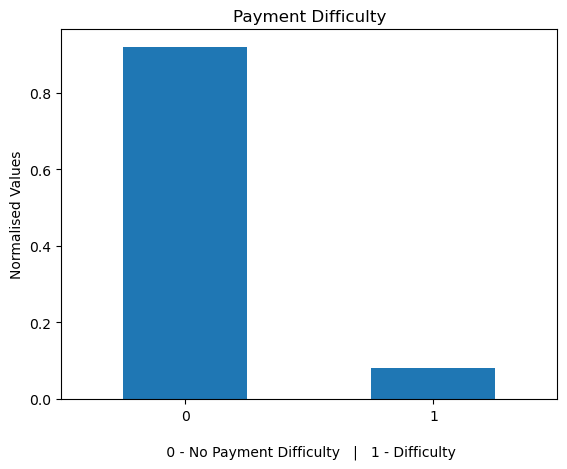

In [85]:
application_df.TARGET.value_counts(normalize=True).plot.bar()
plt.title("Payment Difficulty")
plt.xlabel("\n 0 - No Payment Difficulty   |   1 - Difficulty")
plt.xticks(rotation =0)
plt.ylabel("Normalised Values")
plt.show()

NAME_CONTRACT_TYPE
Cash loans         0.904787
Revolving loans    0.095213
Name: proportion, dtype: float64


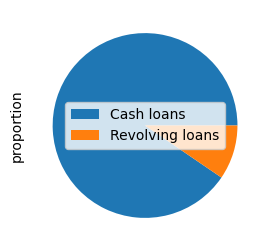

CODE_GENDER
F      0.658344
M      0.341643
XNA    0.000013
Name: proportion, dtype: float64


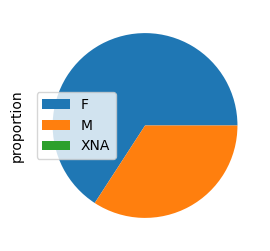

FLAG_OWN_CAR
N    0.659892
Y    0.340108
Name: proportion, dtype: float64


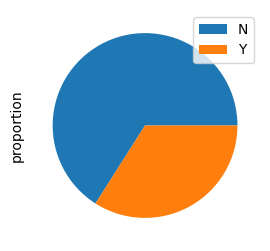

FLAG_OWN_REALTY
Y    0.693673
N    0.306327
Name: proportion, dtype: float64


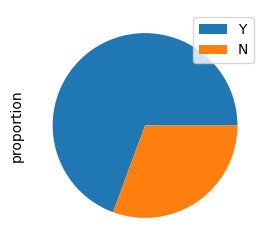

NAME_TYPE_SUITE
Unaccompanied      0.812387
Family             0.130561
Spouse, partner    0.036974
Children           0.010624
Other_B            0.005756
Other_A            0.002816
Group of people    0.000881
Name: proportion, dtype: float64


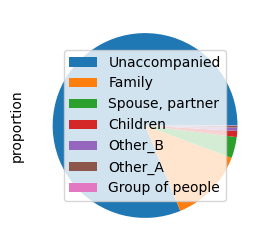

NAME_INCOME_TYPE
Working                 0.516320
Commercial associate    0.232892
Pensioner               0.180033
State servant           0.070576
Unemployed              0.000072
Student                 0.000059
Businessman             0.000033
Maternity leave         0.000016
Name: proportion, dtype: float64


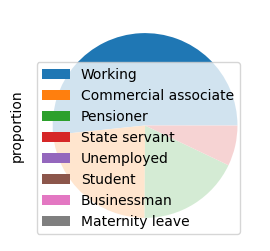

NAME_EDUCATION_TYPE
Secondary / secondary special    0.710189
Higher education                 0.243448
Incomplete higher                0.033420
Lower secondary                  0.012409
Academic degree                  0.000533
Name: proportion, dtype: float64


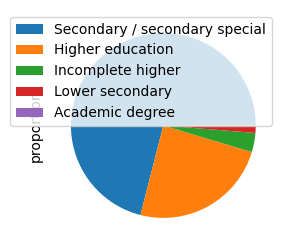

NAME_FAMILY_STATUS
Married                 0.638780
Single / not married    0.147780
Civil marriage          0.096826
Separated               0.064290
Widow                   0.052317
Unknown                 0.000007
Name: proportion, dtype: float64


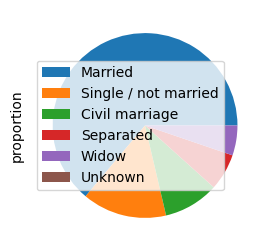

NAME_HOUSING_TYPE
House / apartment      0.887344
With parents           0.048258
Municipal apartment    0.036366
Rented apartment       0.015873
Office apartment       0.008510
Co-op apartment        0.003649
Name: proportion, dtype: float64


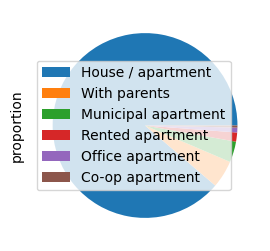

OCCUPATION_TYPE
NaN                      0.313455
Laborers                 0.179460
Sales staff              0.104393
Core staff               0.089655
Managers                 0.069497
Drivers                  0.060495
High skill tech staff    0.037007
Accountants              0.031911
Medicine staff           0.027762
Security staff           0.021856
Cooking staff            0.019336
Cleaning staff           0.015131
Private service staff    0.008624
Low-skill Laborers       0.006806
Waiters/barmen staff     0.004384
Secretaries              0.004244
Realty agents            0.002442
HR staff                 0.001831
IT staff                 0.001711
Name: proportion, dtype: float64


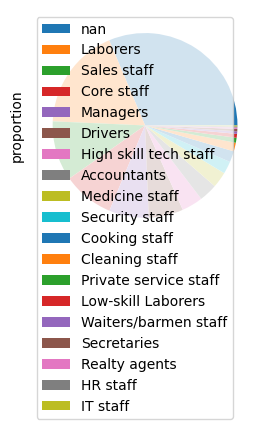

WEEKDAY_APPR_PROCESS_START
TUESDAY      0.175282
WEDNESDAY    0.168885
MONDAY       0.164918
THURSDAY     0.164518
FRIDAY       0.163695
SATURDAY     0.110084
SUNDAY       0.052619
Name: proportion, dtype: float64


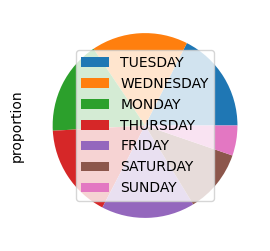

ORGANIZATION_TYPE
Business Entity Type 3    0.221104
XNA                       0.180072
Self-employed             0.124913
Other                     0.054252
Medicine                  0.036399
Business Entity Type 2    0.034317
Government                0.033833
School                    0.028919
Trade: type 7             0.025466
Kindergarten              0.022373
Construction              0.021856
Business Entity Type 1    0.019459
Transport: type 4         0.017554
Trade: type 3             0.011356
Industry: type 9          0.010952
Industry: type 3          0.010660
Security                  0.010559
Housing                   0.009619
Industry: type 11         0.008793
Military                  0.008566
Bank                      0.008153
Agriculture               0.007980
Police                    0.007613
Transport: type 2         0.007167
Postal                    0.007014
Security Ministries       0.006419
Trade: type 2             0.006179
Restaurant                0.005889
Se

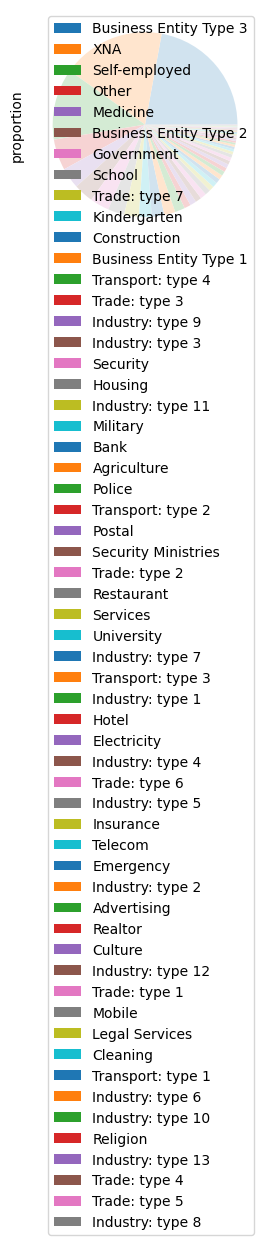

RecursionError: maximum recursion depth exceeded

In [86]:
#Checking all object types Variables and their values

for i in application_df.columns:
    if application_df[i].dtypes=="object":
        print(application_df[i].value_counts(normalize=True, dropna= False))
        plt.figure(figsize=[3,3])
        application_df[i].value_counts(normalize=True, dropna=False).plot.pie(labeldistance=None)
        plt.legend()
        plt.show()
      

In [89]:
## seggrasgating the numeric columns to see the outliers
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
outlier_df = application_df.select_dtypes(include=numerics)

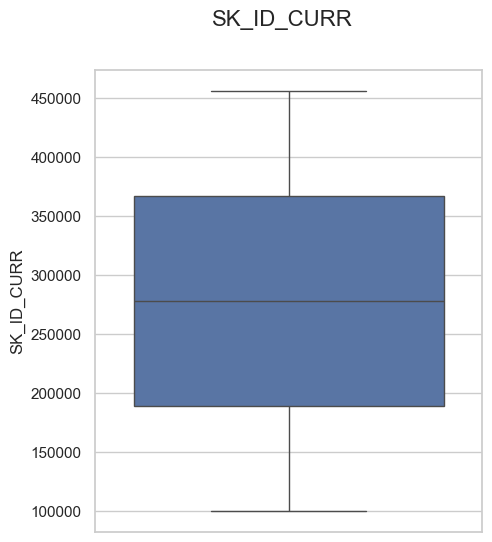

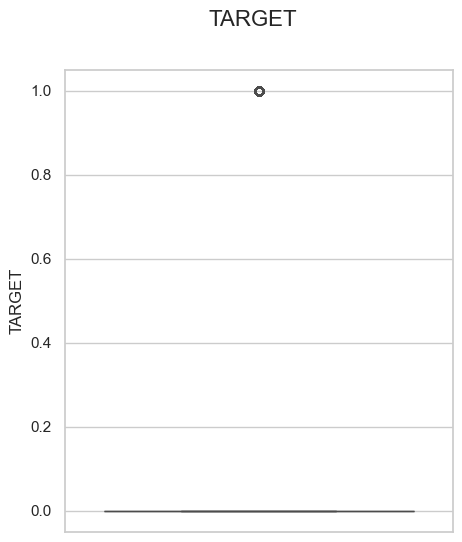

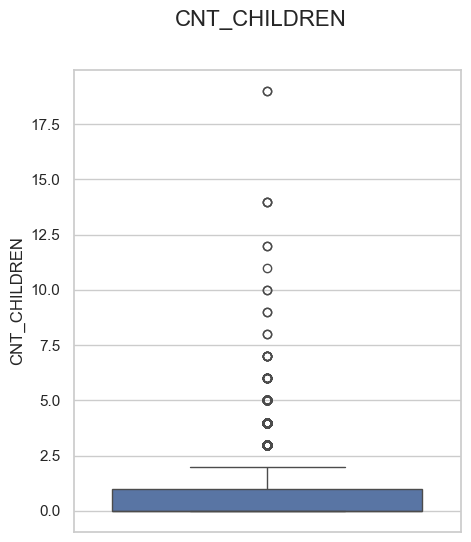

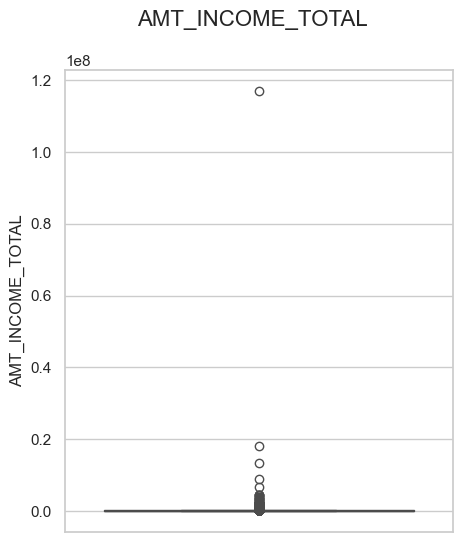

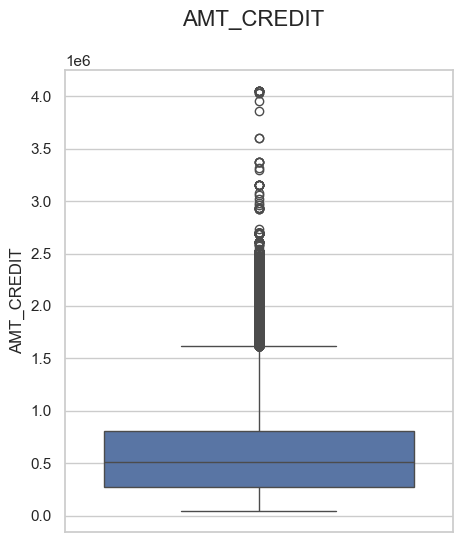

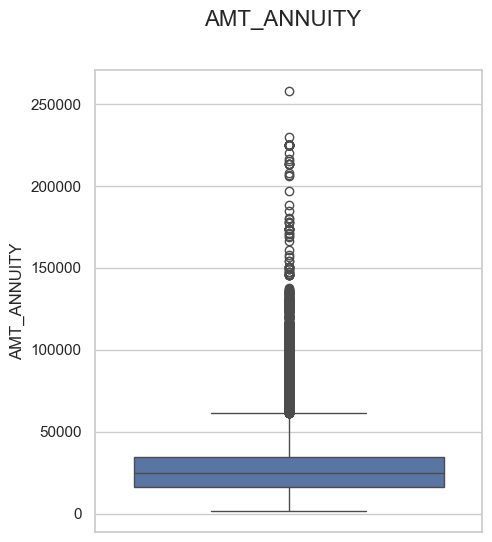

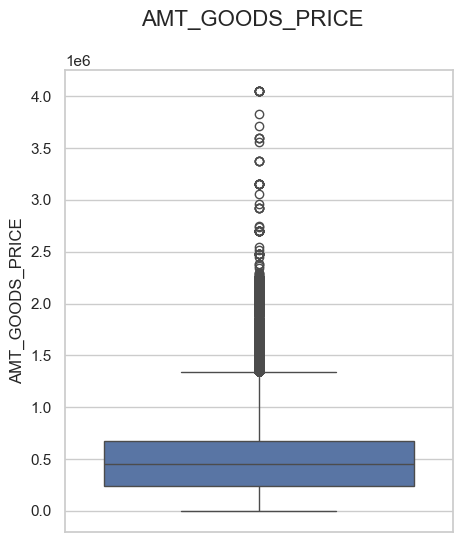

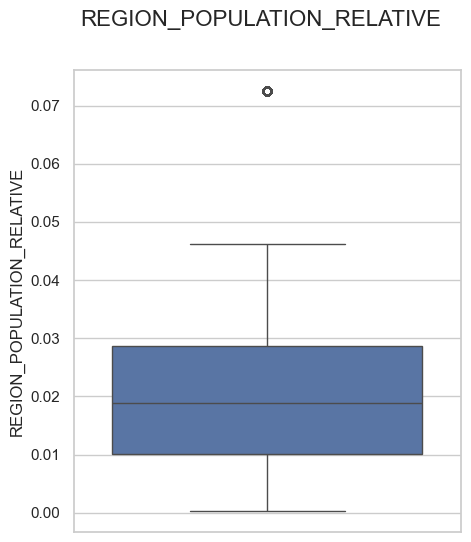

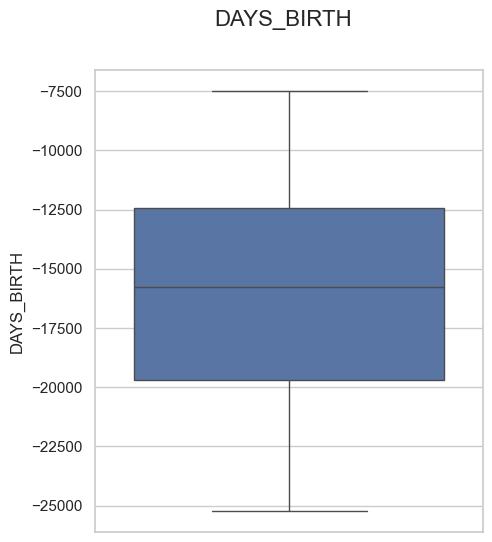

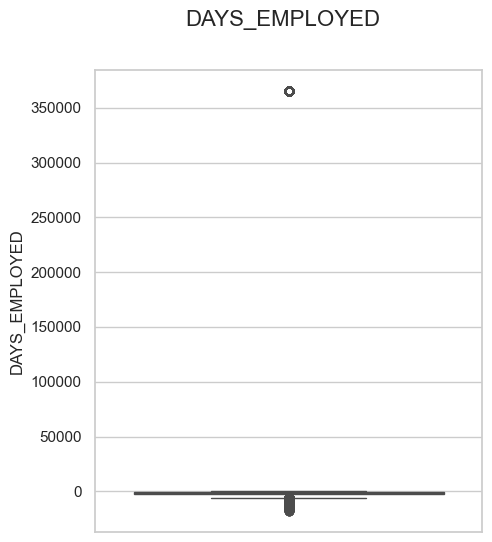

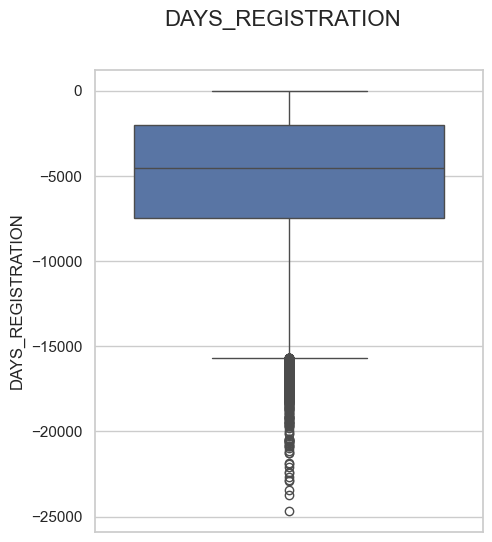

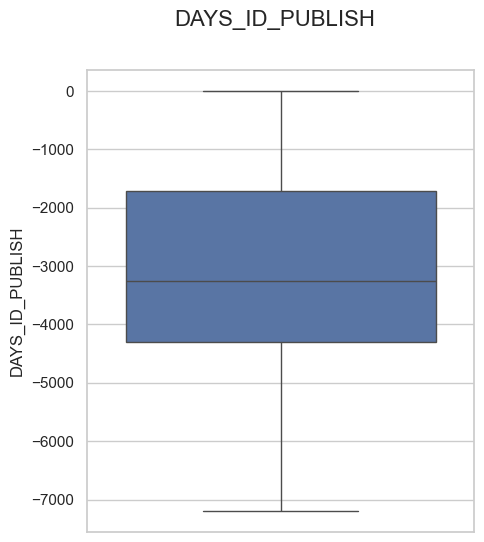

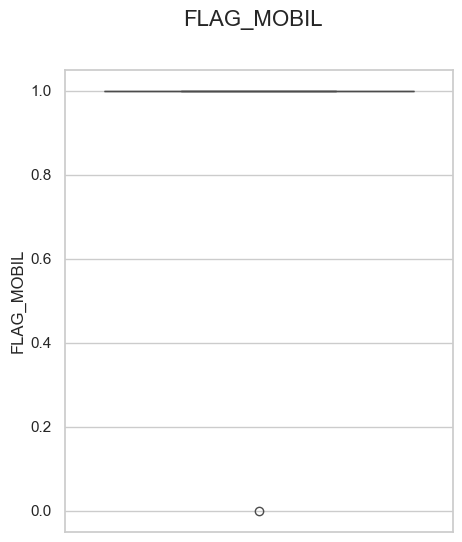

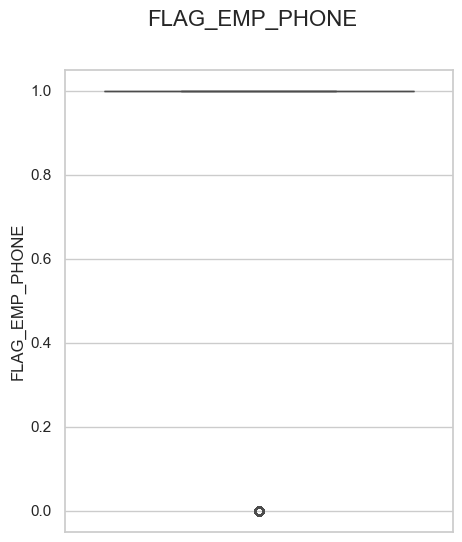

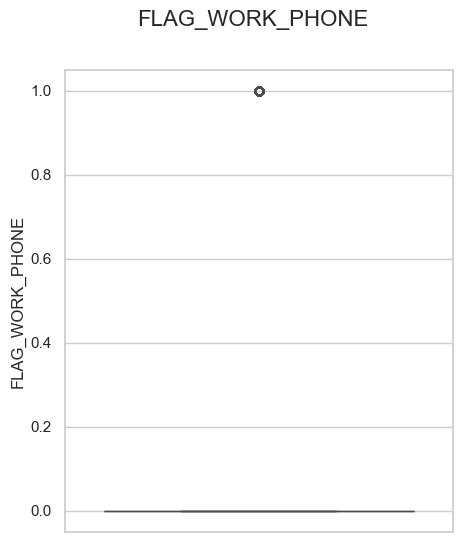

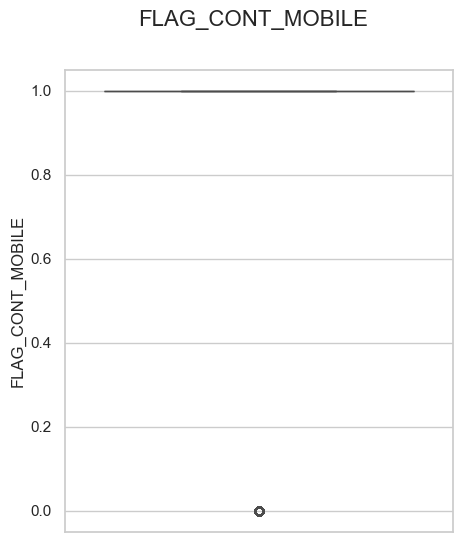

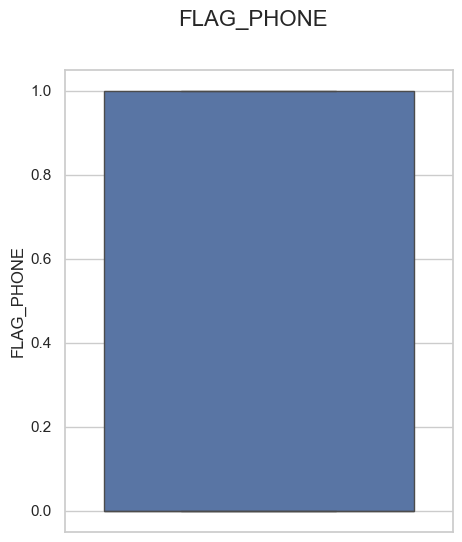

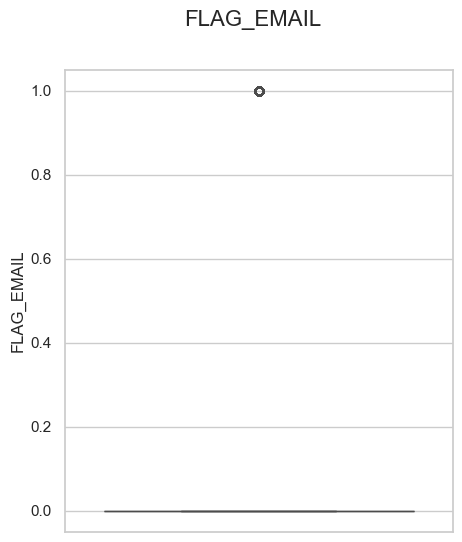

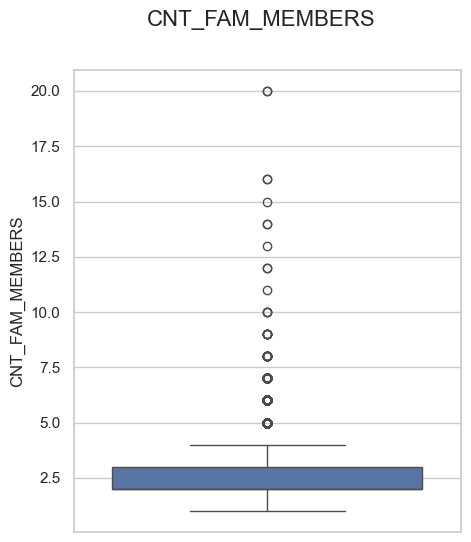

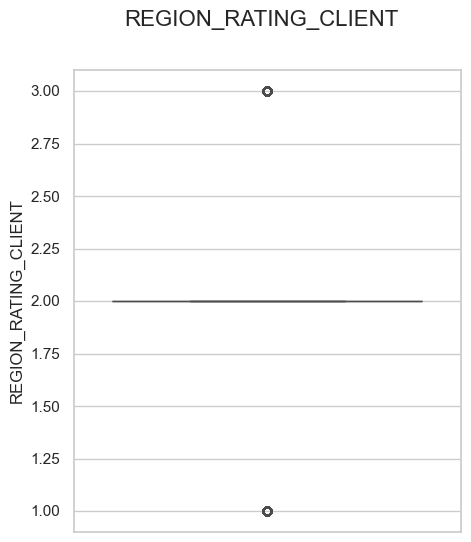

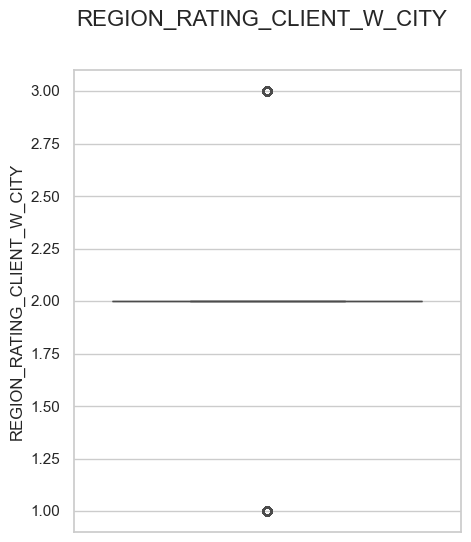

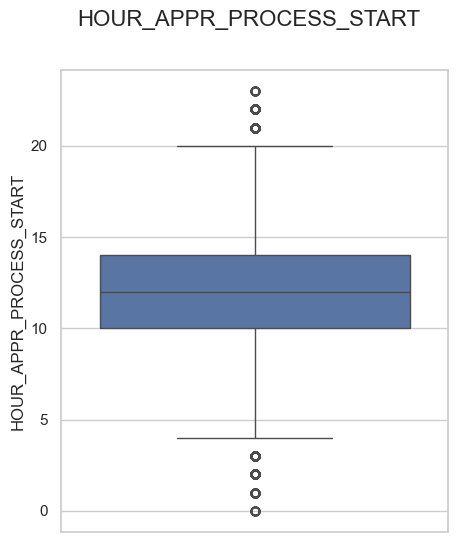

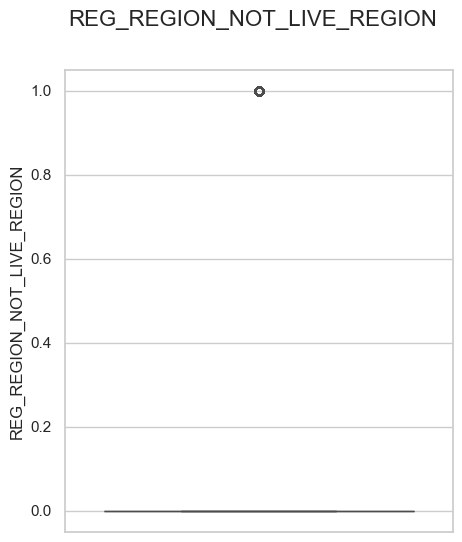

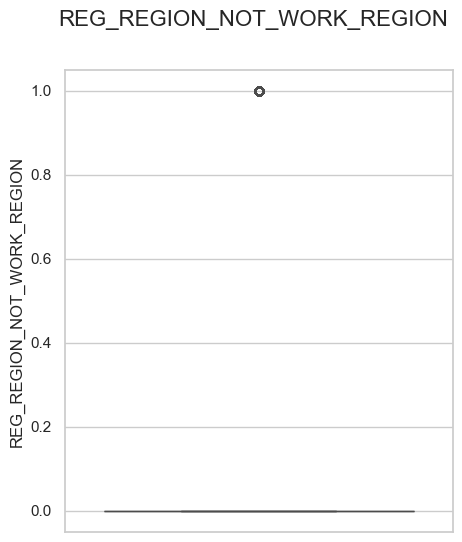

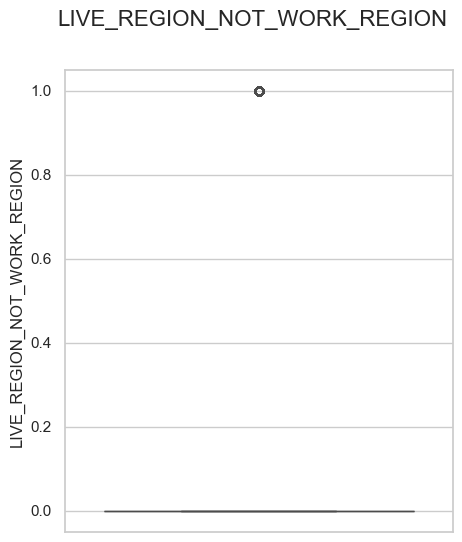

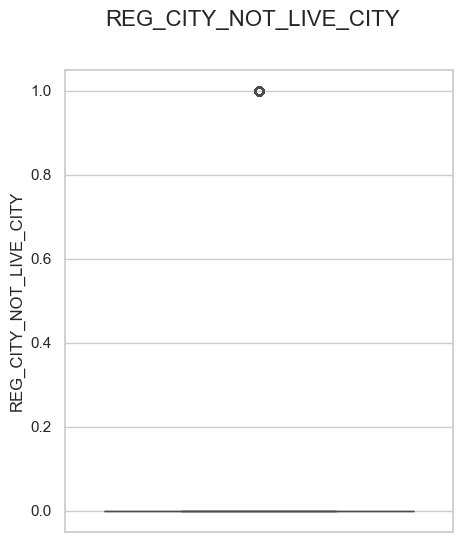

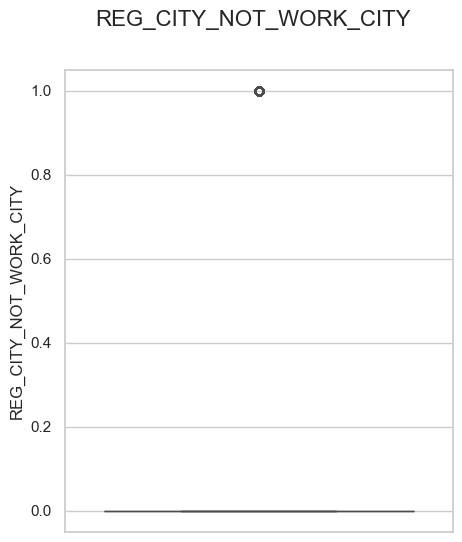

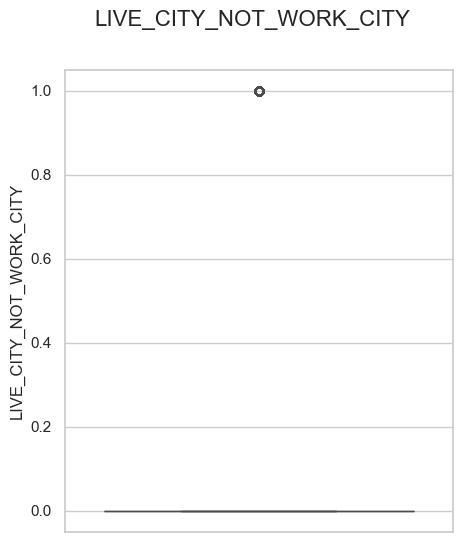

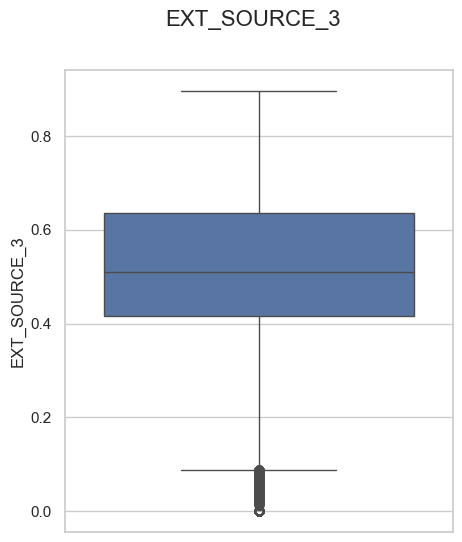

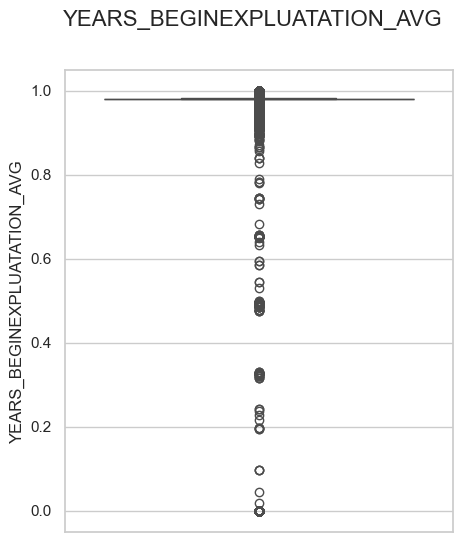

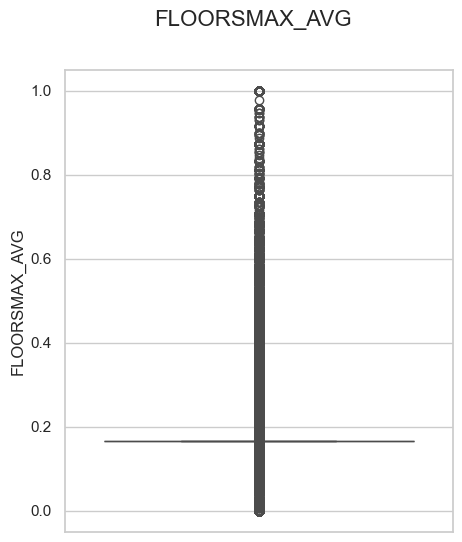

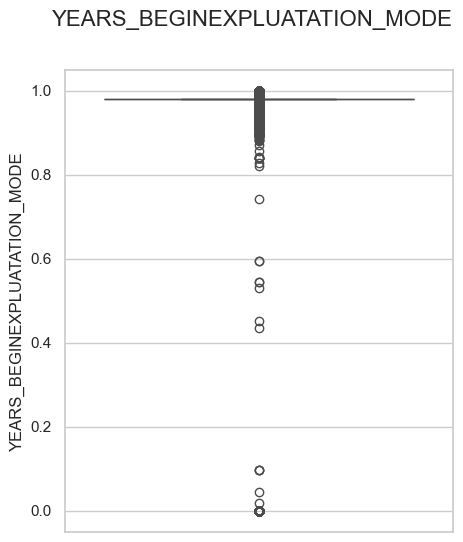

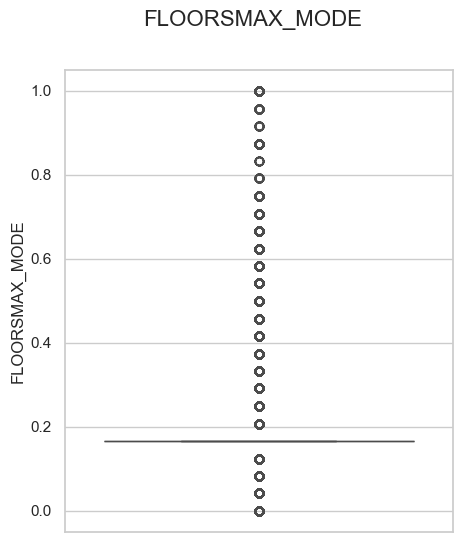

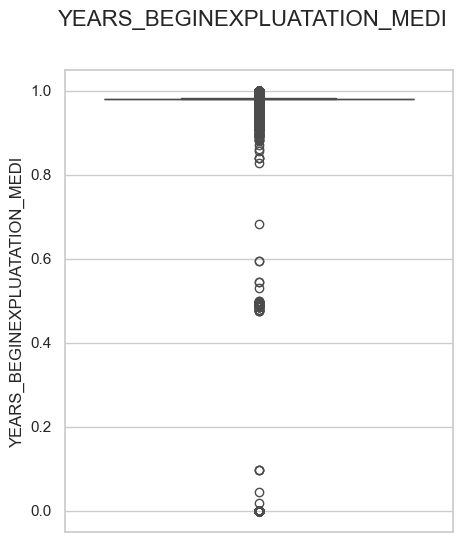

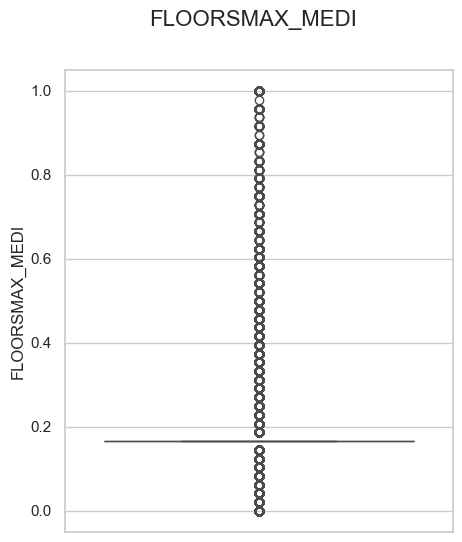

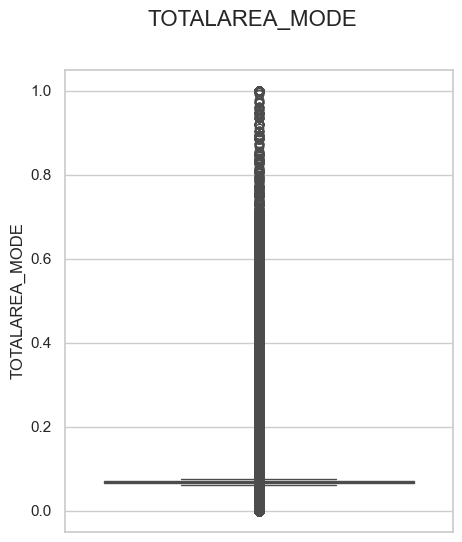

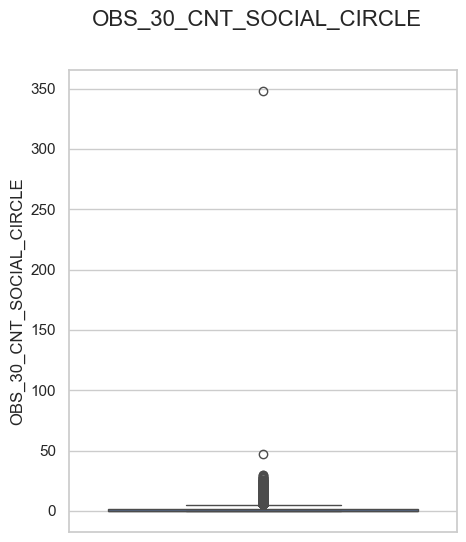

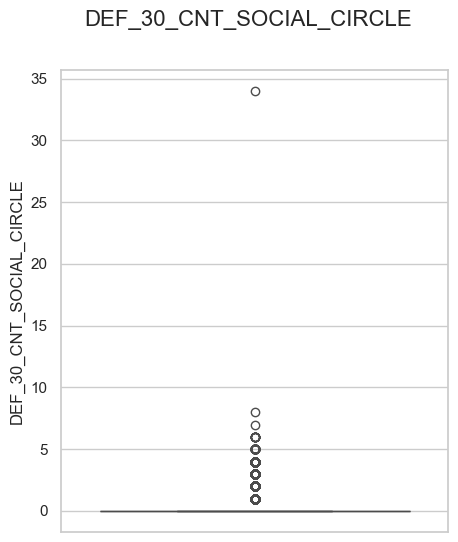

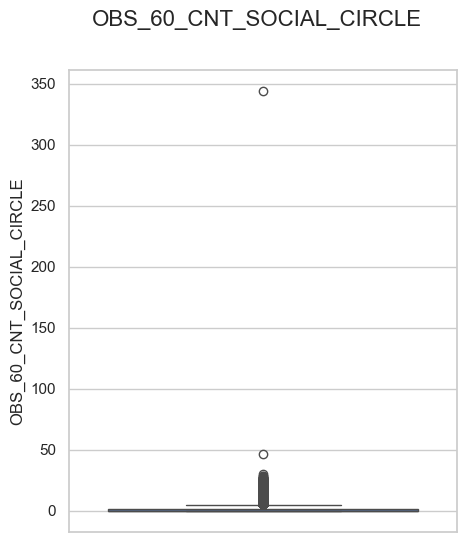

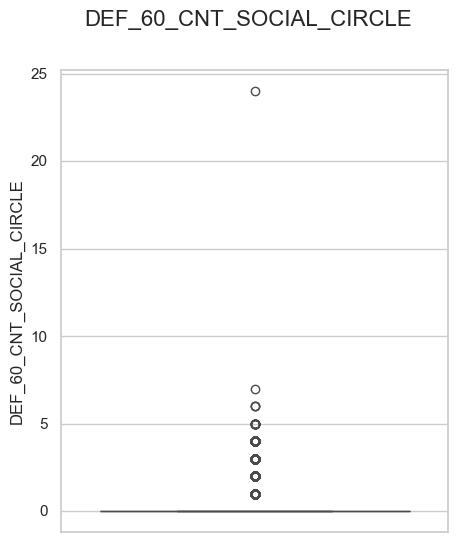

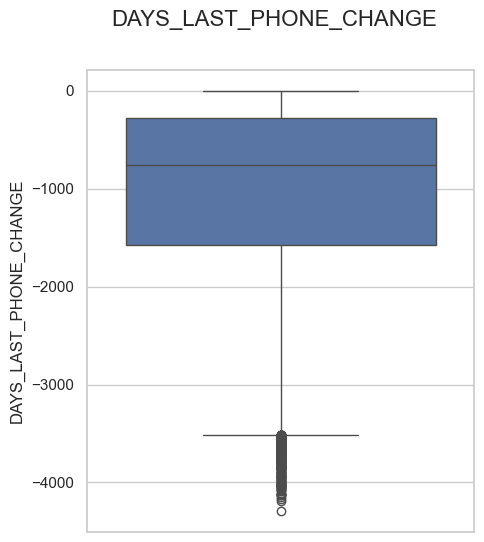

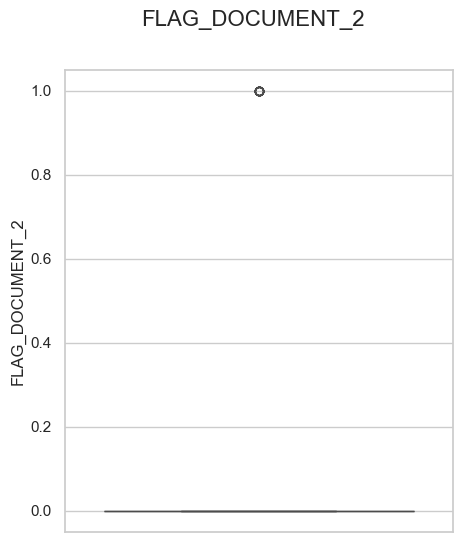

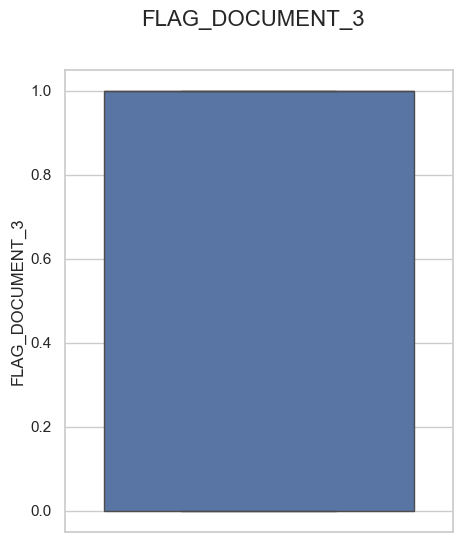

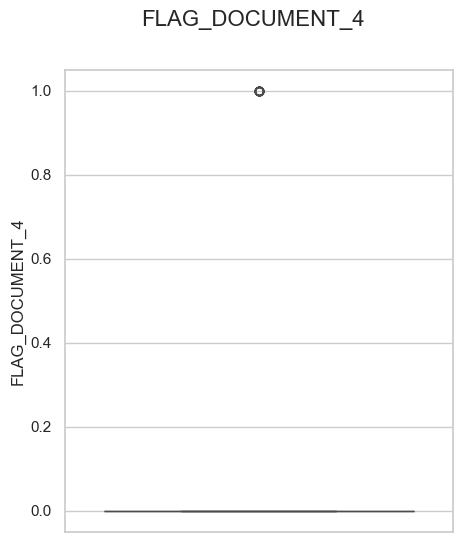

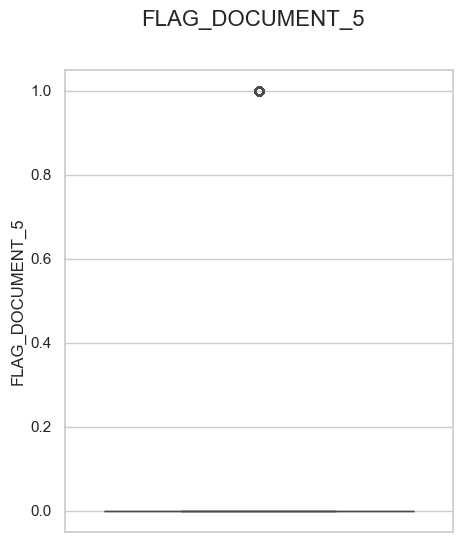

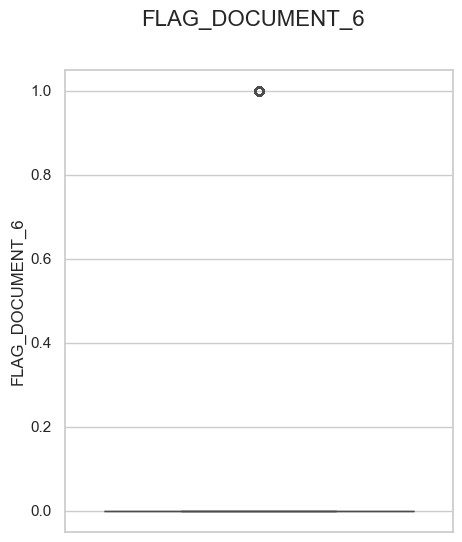

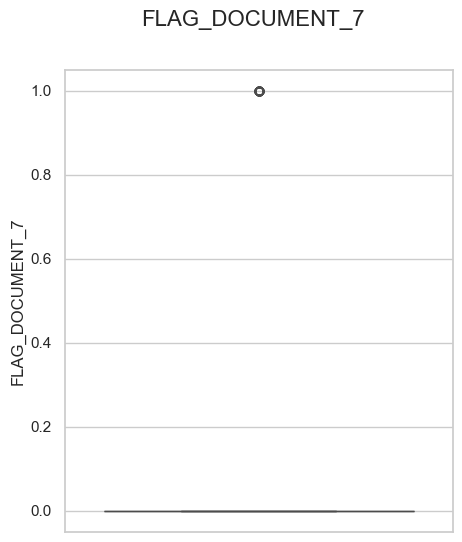

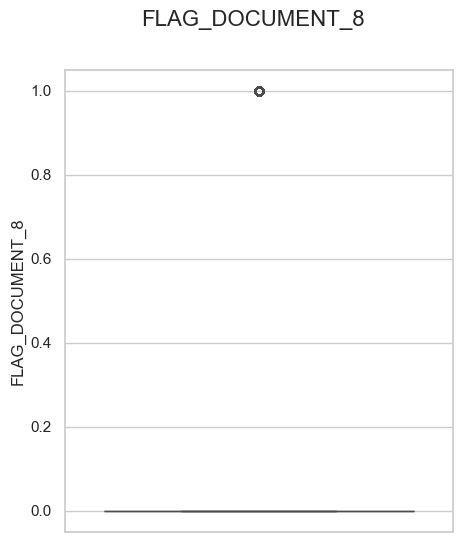

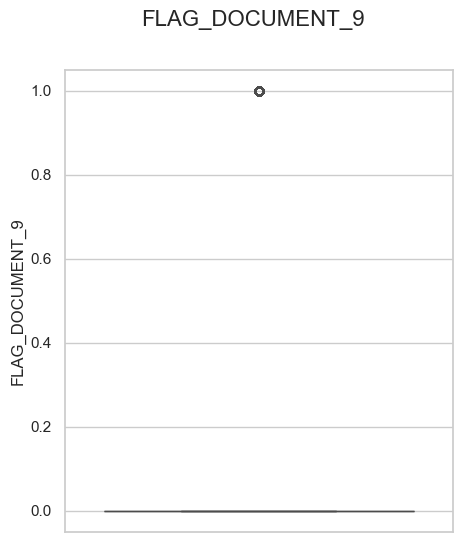

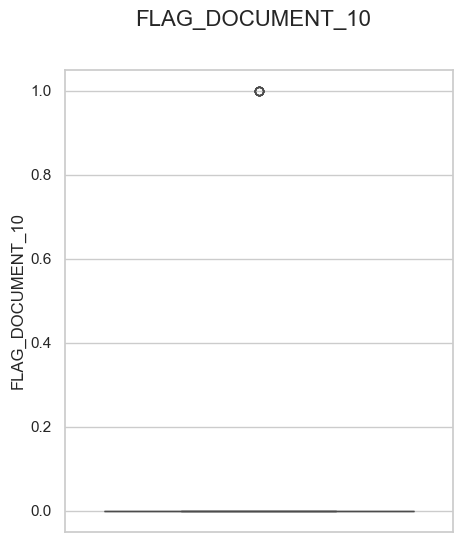

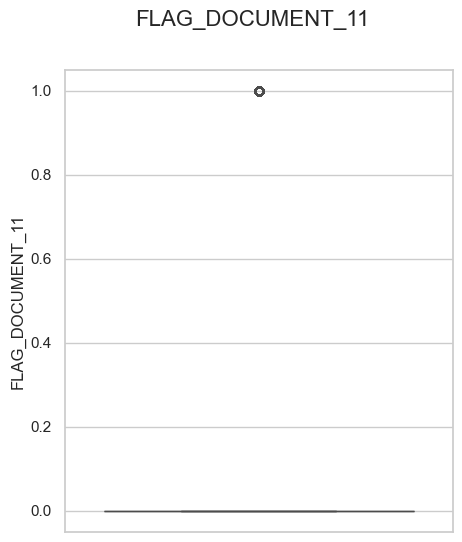

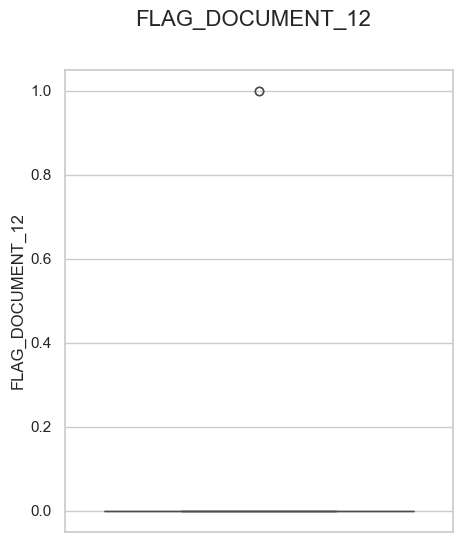

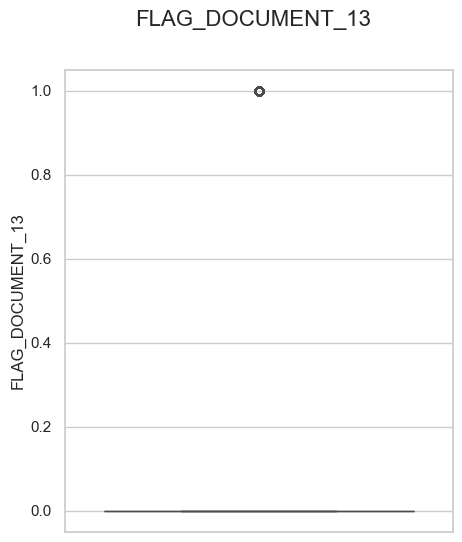

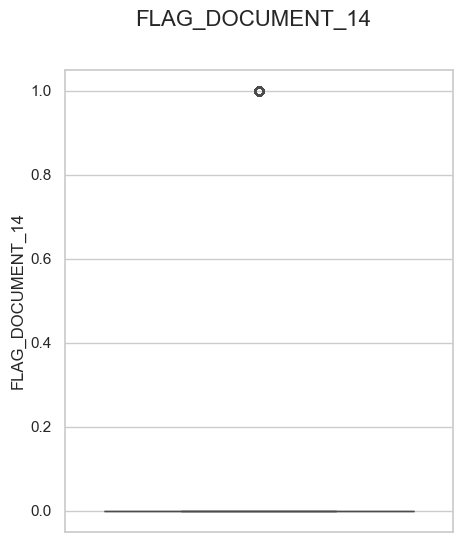

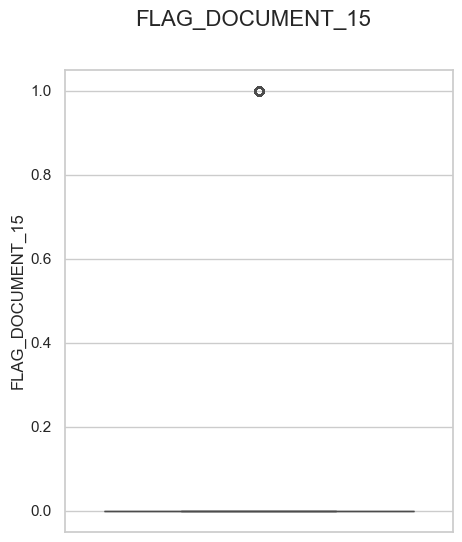

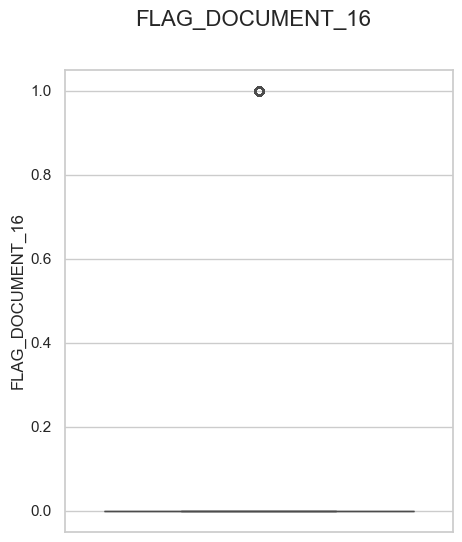

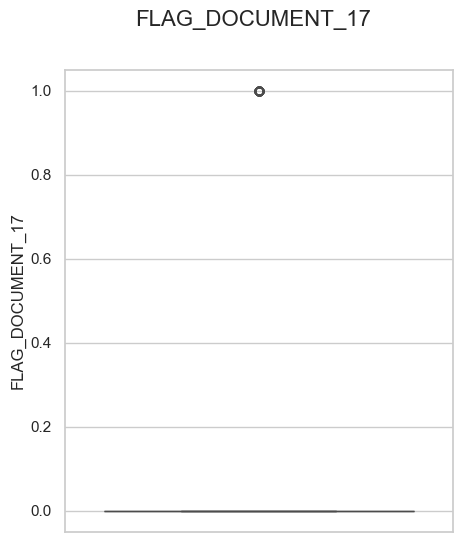

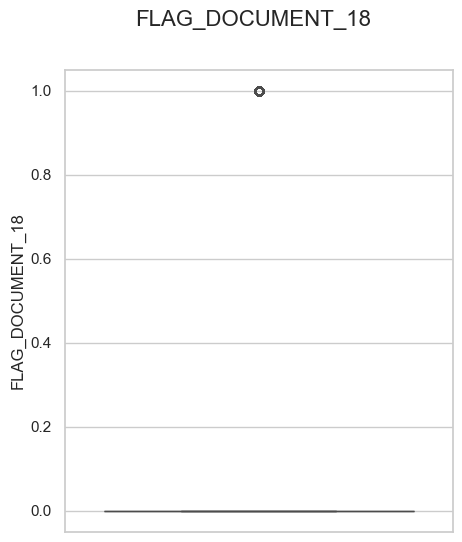

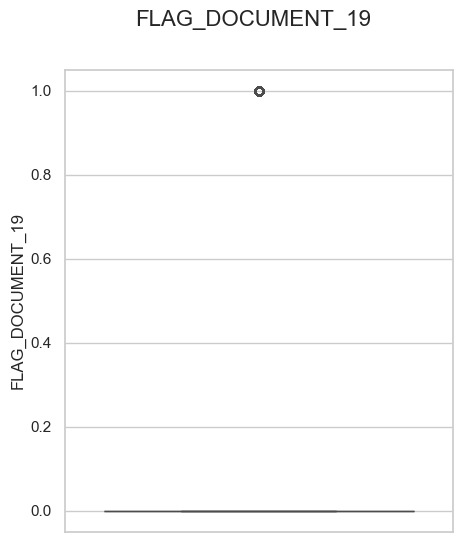

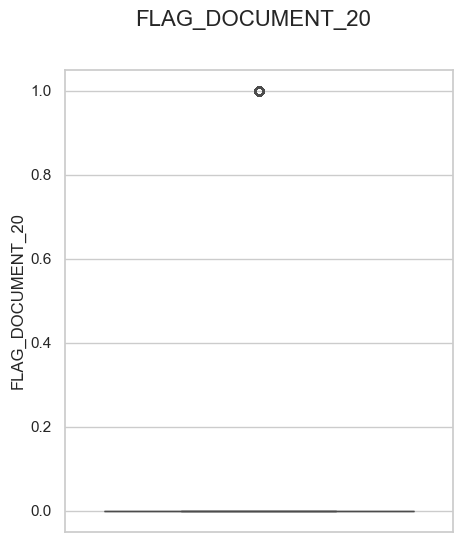

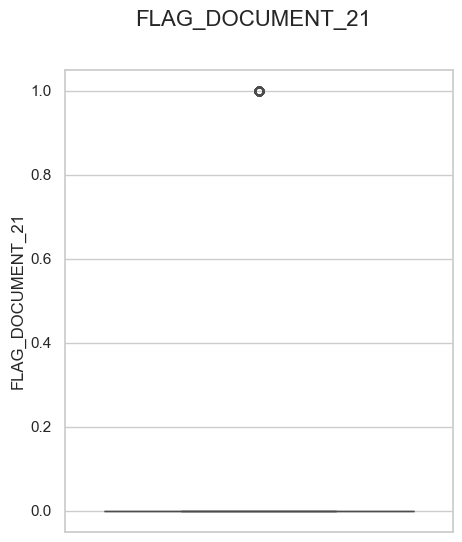

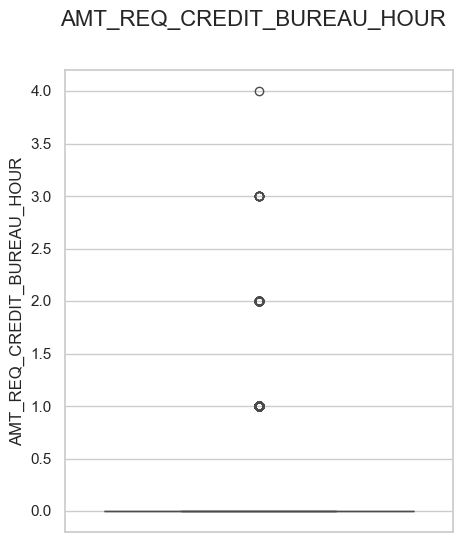

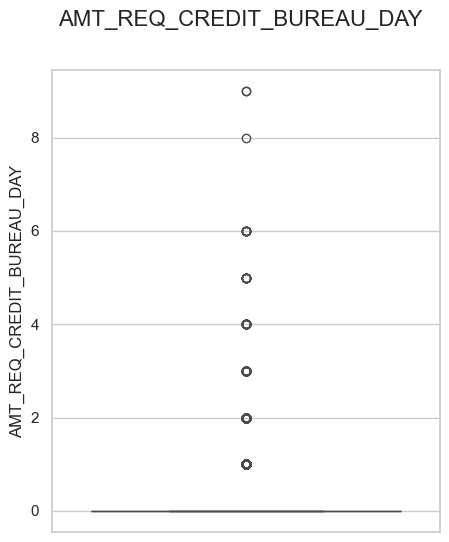

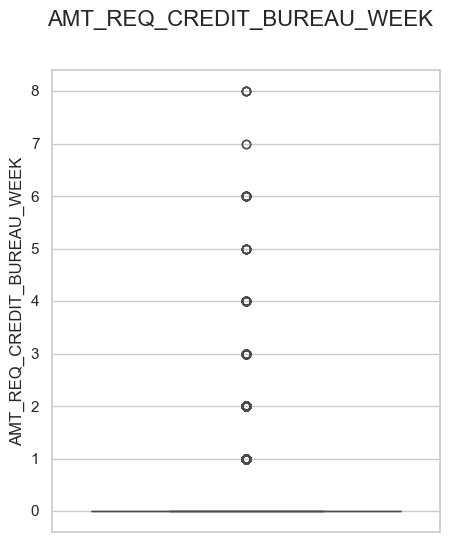

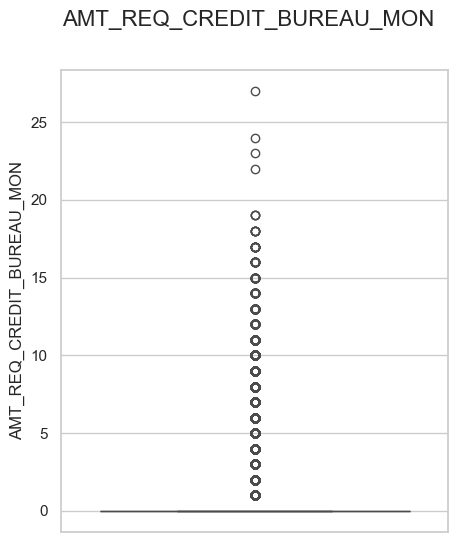

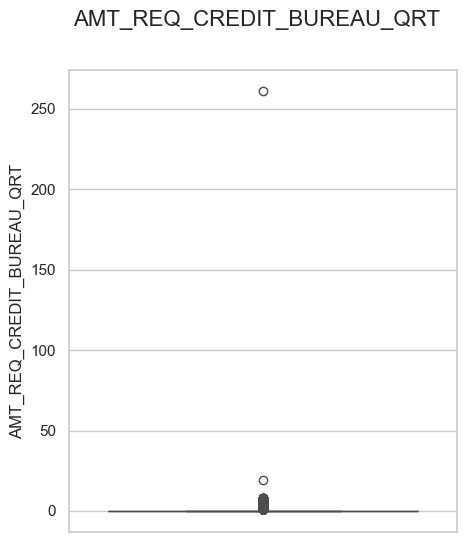

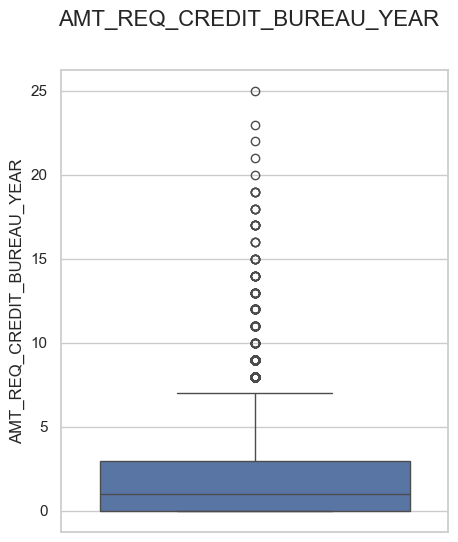

In [90]:
sns.set(style="whitegrid")
for cols,values in outlier_df.items():
    f, ax = plt.subplots(1,1,figsize=(5,6))
    f.suptitle(cols, fontsize=16)
    outlier_plot = sns.boxplot(outlier_df[cols])
    plt.show()

In [87]:
application_df[['CNT_FAM_MEMBERS','DAYS_EMPLOYED','AMT_INCOME_TOTAL']].describe().T

count           mean            std      min       25%  \
CNT_FAM_MEMBERS   307509.0       2.152665       0.910682      1.0       2.0   
DAYS_EMPLOYED     307511.0   63815.045904  141275.766519 -17912.0   -2760.0   
AMT_INCOME_TOTAL  307511.0  168797.919297  237123.146279  25650.0  112500.0   

                       50%       75%          max  
CNT_FAM_MEMBERS        2.0       3.0         20.0  
DAYS_EMPLOYED      -1213.0    -289.0     365243.0  
AMT_INCOME_TOTAL  147150.0  202500.0  117000000.0

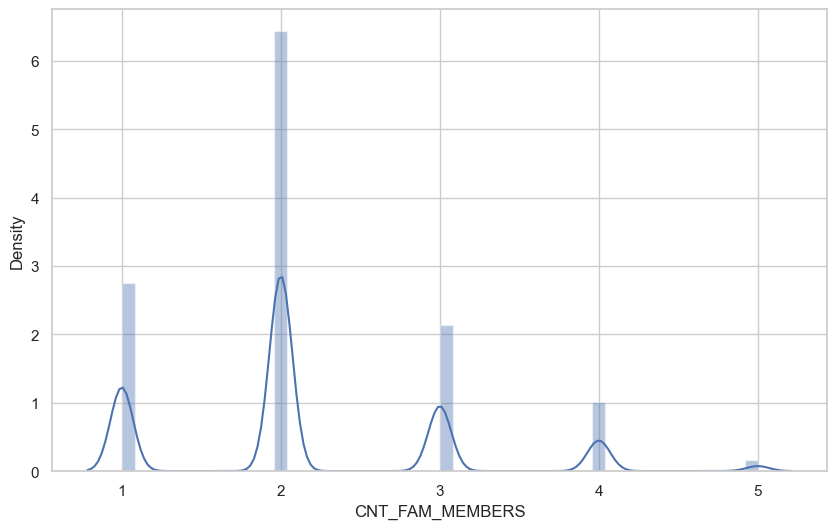

In [91]:
q1 = application_df['CNT_FAM_MEMBERS'].quantile(0.99)
application_df['CNT_FAM_MEMBERS'] = application_df['CNT_FAM_MEMBERS'].apply(lambda x: q1 if x>q1 else x)

# displaying a plot to show that the values have been restricted to a max value as 5
f, ax = plt.subplots(figsize=(10,6))
outlier_plot_1 = sns.distplot(application_df["CNT_FAM_MEMBERS"])

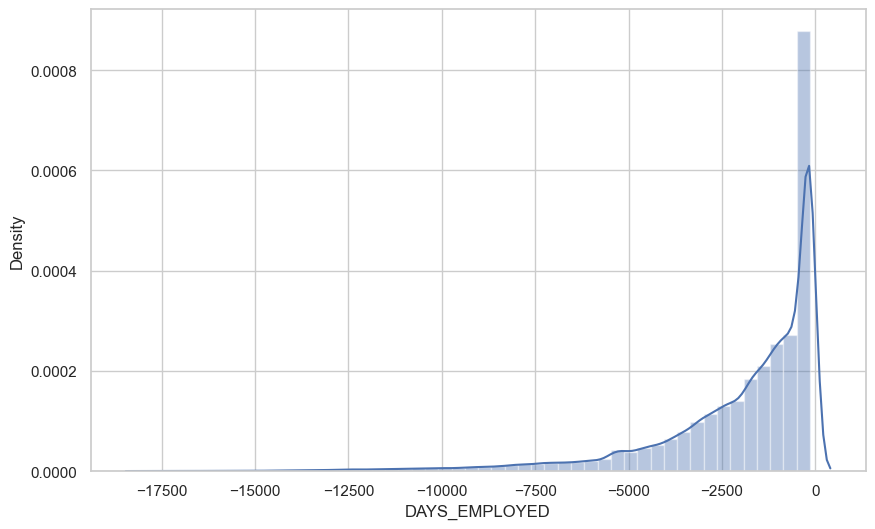

In [92]:
# displaying a plot to show that the values have been restricted so that we don't get highly distributed values


q2=application_df["DAYS_EMPLOYED"].quantile(0.80)
application_df["DAYS_EMPLOYED"] =  application_df.DAYS_EMPLOYED.apply(lambda x: q2 if x>q2 else x)

f, ax = plt.subplots(figsize=(10,6))
outlier_plot_2 = sns.distplot(application_df["DAYS_EMPLOYED"])

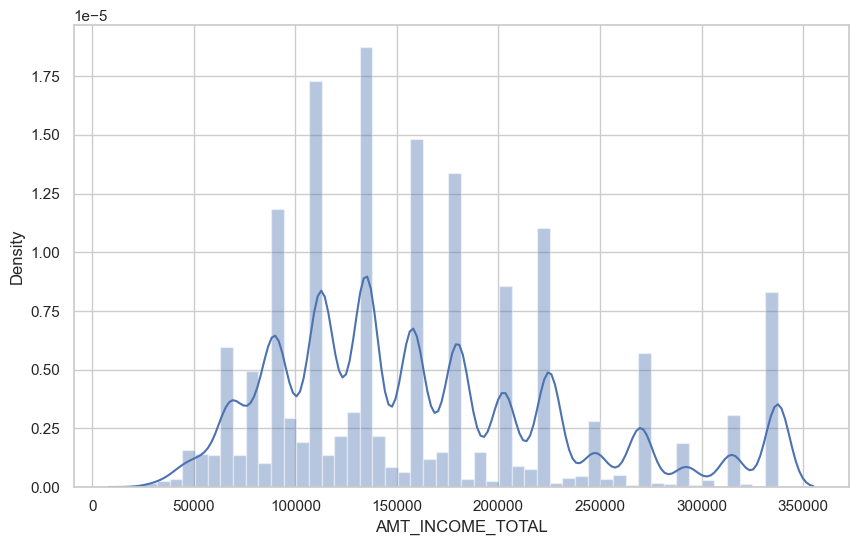

In [93]:
#  displaying a plot to show that the values have been restricted so that we dont get highly distributed values

q3=application_df["AMT_INCOME_TOTAL"].quantile(0.95)
application_df["AMT_INCOME_TOTAL"] =  application_df.AMT_INCOME_TOTAL.apply(lambda x: q3 if x>q3 else x)

f, ax = plt.subplots(figsize=(10,6))
outlier_plot_3 = sns.distplot(application_df["AMT_INCOME_TOTAL"])

In [95]:
# Converting DAYS_BIRTH to AGE
application_df["AGE"] = application_df.DAYS_BIRTH.apply(lambda x :round(abs(x)/365),0)
#application_df["AGE"]
application_df["AGE"] = pd.to_numeric(application_df["AGE"])

In [96]:
#Dropping the DAYS_Birth column since we have created an AGE column for the same
application_df.drop('DAYS_BIRTH',axis=1,inplace=True)

In [97]:
application_df.AMT_INCOME_TOTAL.quantile([0.25,0.5,0.85,1])

0.25    112500.0
0.50    147150.0
0.85    234000.0
1.00    337500.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [98]:
# Based on the Quantile Values , segregating the values to its respective categories
def salary_category_func(x):
    if x>=234000:
        return('HIGH')
    elif x<234000 and x>=147150:
        return('MODERATE')
    elif x<147150 and x>=112500:
        return('LOW')
    else:
        return("EXTREMELY LOW")
application_df["SALARY_CATEGORY"] = application_df.AMT_INCOME_TOTAL.apply(salary_category_func)    
#application_df["SALARY_CATEGORY"]

In [99]:
application_df["SALARY_CATEGORY"].value_counts()

SALARY_CATEGORY
MODERATE         106966
LOW               84194
EXTREMELY LOW     69559
HIGH              46792
Name: count, dtype: int64

In [100]:
#Dropping "AMT_INCOME_TOTAL" Column,because have Binned those Salary Values
application_df.drop("AMT_INCOME_TOTAL",axis=1,inplace=True)

In [101]:
#We can see there is a huge imbalance in out Target variable. So we can segregate the Target variable into two different dataframes

good_client = application_df[application_df.TARGET == 0]
defaulter_client = application_df[application_df.TARGET == 1]


In [102]:
good_client.info()

<class 'pandas.core.frame.DataFrame'>
Index: 282686 entries, 1 to 307510
Data columns (total 81 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    282686 non-null  int64  
 1   TARGET                        282686 non-null  int64  
 2   NAME_CONTRACT_TYPE            282686 non-null  object 
 3   CODE_GENDER                   282686 non-null  object 
 4   FLAG_OWN_CAR                  282686 non-null  object 
 5   FLAG_OWN_REALTY               282686 non-null  object 
 6   CNT_CHILDREN                  282686 non-null  int64  
 7   AMT_CREDIT                    282686 non-null  float64
 8   AMT_ANNUITY                   282674 non-null  float64
 9   AMT_GOODS_PRICE               282686 non-null  float64
 10  NAME_TYPE_SUITE               282686 non-null  object 
 11  NAME_INCOME_TYPE              282686 non-null  object 
 12  NAME_EDUCATION_TYPE           282686 non-null  ob

In [109]:
defaulter_client.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24825 entries, 0 to 307509
Data columns (total 81 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   SK_ID_CURR                    24825 non-null  int64  
 1   TARGET                        24825 non-null  int64  
 2   NAME_CONTRACT_TYPE            24825 non-null  object 
 3   CODE_GENDER                   24825 non-null  object 
 4   FLAG_OWN_CAR                  24825 non-null  object 
 5   FLAG_OWN_REALTY               24825 non-null  object 
 6   CNT_CHILDREN                  24825 non-null  int64  
 7   AMT_CREDIT                    24825 non-null  float64
 8   AMT_ANNUITY                   24825 non-null  float64
 9   AMT_GOODS_PRICE               24825 non-null  float64
 10  NAME_TYPE_SUITE               24825 non-null  object 
 11  NAME_INCOME_TYPE              24825 non-null  object 
 12  NAME_EDUCATION_TYPE           24825 non-null  object 
 13  NAME_

In [110]:
#Check for clients who are unlikely to pay the loans
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
Univariate_defaulter_Num_1_df = defaulter_client.select_dtypes(include=numerics)
#Univariate_defaulter_Num_1_df

In [111]:
categorical = ["object"]
Univariate_defaulter_Cat_1_df =defaulter_client.select_dtypes(include=categorical)
#Univariate_defaulter_Cat_1_df

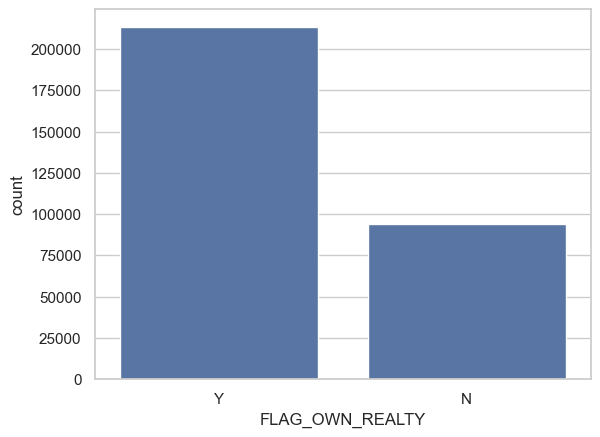

In [112]:
#graph to plot Number of property owners and non-property owners in the entire population
PropertyOwners_vs_Total = sns.countplot(x=application_df.FLAG_OWN_REALTY,data =application_df)

In [113]:
#find the percentage of property and non-property owners in the defaulter list
test_df1=round((Univariate_defaulter_Cat_1_df["FLAG_OWN_REALTY"].value_counts()/application_df["FLAG_OWN_REALTY"].value_counts())*100,2)
test_df1 = pd.DataFrame(test_df1)
test_df1.reset_index(level=0, inplace=True)
test_df1.rename(columns=  {"Default_Percentage": "FLAG_OWN_REALTY", 
                     "count":"Default_Percentage"}, 
                                 inplace = True) 
test_df1

FLAG_OWN_REALTY  Default_Percentage
0               Y                7.96
1               N                8.32

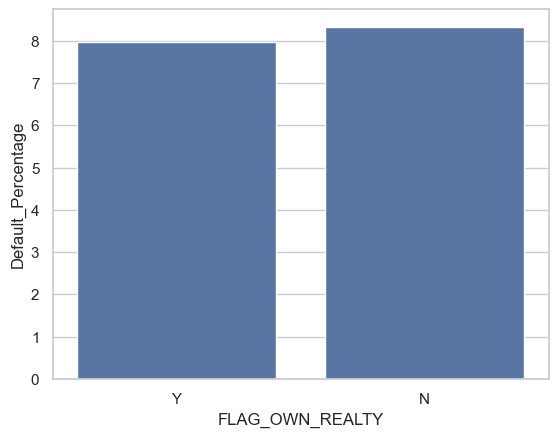

In [114]:
#plot to show the number of property and non-property owners vs. Target variable. Here, Target =1

PropertyOwners_vs_Target= sns.barplot(x="FLAG_OWN_REALTY",y="Default_Percentage",data=test_df1)

In [115]:
#From above graph, we can see that the number of non-payers of loan i.e., defaulters are very close almost equal to 9%. It is difficult to decide a target based on this metric.

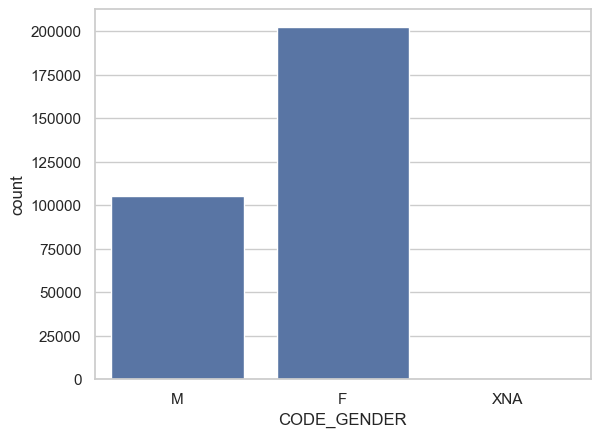

In [116]:
#graph to plot Males and femals in the entire polulation
Gender_vs_Total = sns.countplot(x="CODE_GENDER",data =application_df)

In [117]:
#find the percentage of males and females in the defaulter list
test_df2=round((Univariate_defaulter_Cat_1_df["CODE_GENDER"].value_counts()/application_df["CODE_GENDER"].value_counts())*100,2)
test_df2 = pd.DataFrame(test_df2)
test_df2.reset_index(level=0, inplace=True)
test_df2.rename(columns=  {"Default_Percentage": "CODE_GENDER", 
                     "count":"Default_Percentage"}, 
                                 inplace = True) 
test_df2

CODE_GENDER  Default_Percentage
0           F                7.00
1           M               10.14
2         XNA                 NaN

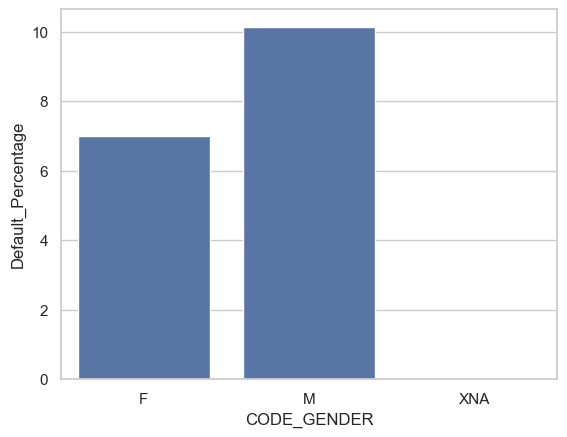

In [118]:
#plot to show the number male and female clients vs. Target variable. Here, Target =1
Gender_vs_Target= sns.barplot(x="CODE_GENDER",y="Default_Percentage",data=test_df2)

In [ ]:
#So, from above plots and data we can cleary see that the Female clients are a better TARGET as compared to the Male clients. Observing the percent of defaulted credits, male client have a higher chance of not returning their loans [10.14%], compared to the female clients [7%].


In [119]:
status = application_df.NAME_FAMILY_STATUS.value_counts()
status = pd.DataFrame(status)
status.reset_index(level=0, inplace=True)
status.rename(columns=  {"number": "NAME_FAMILY_STATUS", 
                     "count":"number"}, 
                                 inplace = True) 
status

NAME_FAMILY_STATUS  number
0               Married  196432
1  Single / not married   45444
2        Civil marriage   29775
3             Separated   19770
4                 Widow   16088
5               Unknown       2

<function matplotlib.pyplot.show(close=None, block=None)>

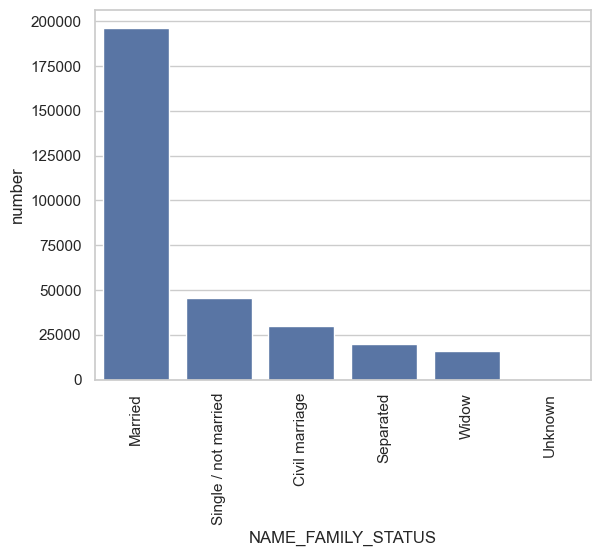

In [120]:
#graph to plot family status of clients in the entire polulation
FamilyStatus_vs_Total = sns.barplot(x="NAME_FAMILY_STATUS",y="number",data =status)
FamilyStatus_vs_Total.set_xticklabels(FamilyStatus_vs_Total.get_xticklabels(),rotation=90)
plt.show

In [121]:
#find the percentage of clients according to family status in the defaulter list
test_df4=round((Univariate_defaulter_Cat_1_df["NAME_FAMILY_STATUS"].value_counts()/application_df["NAME_FAMILY_STATUS"].value_counts())*100,2)
test_df4 = pd.DataFrame(test_df4)
test_df4.reset_index(level=0, inplace=True)
test_df4.rename(columns=  {"Default_Percentage": "NAME_FAMILY_STATUS", 
                     "count":"Default_Percentage"}, 
                                 inplace = True) 
test_df4.sort_values(by='Default_Percentage', inplace=True)
test_df4

NAME_FAMILY_STATUS  Default_Percentage
5                 Widow                5.82
1               Married                7.56
2             Separated                8.19
3  Single / not married                9.81
0        Civil marriage                9.94
4               Unknown                 NaN

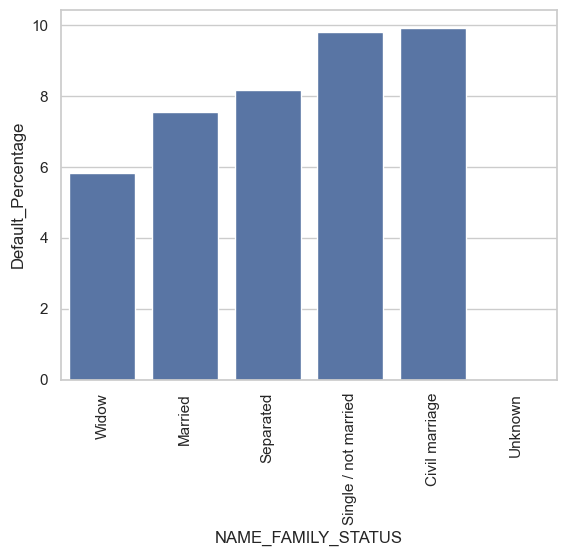

In [122]:
#plot to show the family status of client vs. Target variable. Here, Target =1
FamilyStatus_vs_Target= sns.barplot(x="NAME_FAMILY_STATUS",y="Default_Percentage",data=test_df4)
FamilyStatus_vs_Target.set_xticklabels(FamilyStatus_vs_Target.get_xticklabels(),rotation=90)
plt.show()

In [ ]:
#From above graph we can say that the percentage of non-repayment of loan is at highest for civil mariage and is lowest for widows, Which is interesting to see because you expect widows to not payback their loans but it is the opposite here.

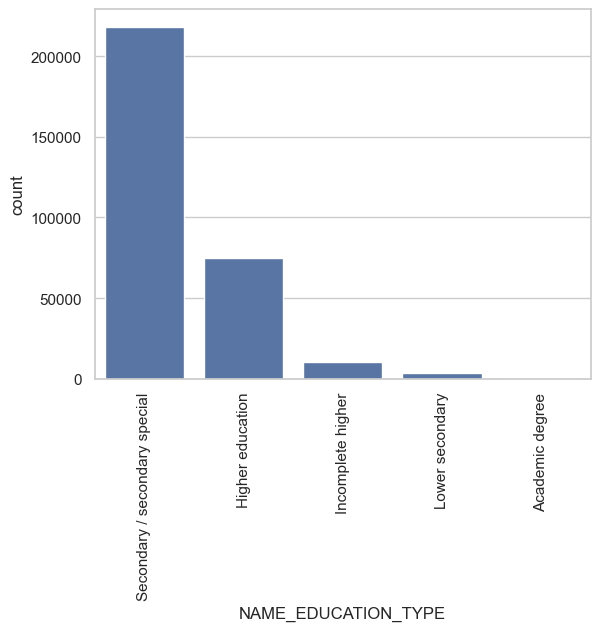

In [123]:
#graph to plot education type in the entire polulation
EducationType_vs_Total = sns.countplot(x="NAME_EDUCATION_TYPE",data =application_df)
EducationType_vs_Total.set_xticklabels(EducationType_vs_Total.get_xticklabels(),rotation=90)
plt.show()

In [124]:
#find the percentage education level of clients in the defaulter list
test_df7=round((Univariate_defaulter_Cat_1_df["NAME_EDUCATION_TYPE"].value_counts()/application_df["NAME_EDUCATION_TYPE"].value_counts())*100,2)

test_df7 = pd.DataFrame(test_df7)

test_df7.reset_index(level=0, inplace=True)
test_df7.sort_values(by=["NAME_EDUCATION_TYPE"],ascending=False,inplace=True)

test_df7.rename(columns=  {"Default_Percentage": "NAME_EDUCATION_TYPE", 
                     "count":"Default_Percentage"}, 
                                  inplace = True) 


test_df7

NAME_EDUCATION_TYPE  Default_Percentage
0  Secondary / secondary special                8.94
3                Lower secondary               10.93
2              Incomplete higher                8.48
1               Higher education                5.36
4                Academic degree                1.83

<Axes: xlabel='NAME_EDUCATION_TYPE', ylabel='Default_Percentage'>

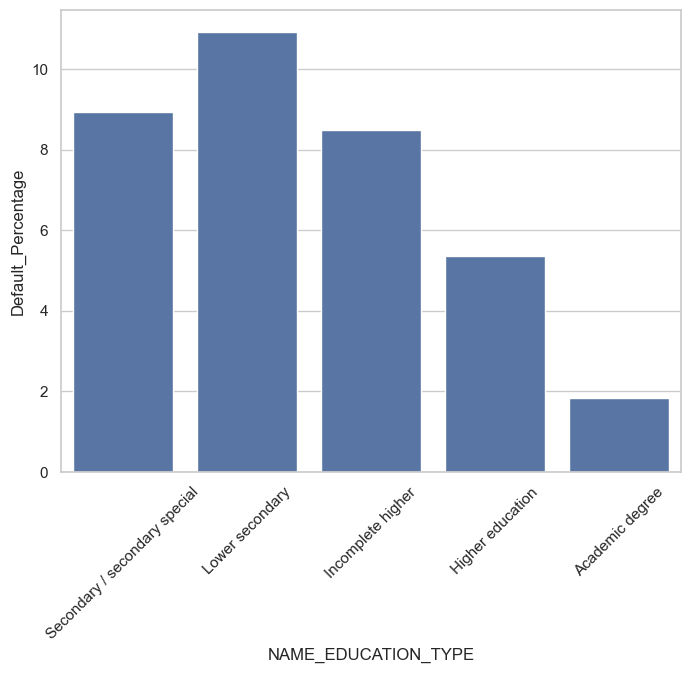

In [125]:
#plot to show the education type of each client vs. Target variable. Here, Target =1
f, ax = plt.subplots(figsize=(8,6))
EducationType_vs_Target= sns.barplot(x="NAME_EDUCATION_TYPE",y="Default_Percentage",data=test_df7,order=test_df7['NAME_EDUCATION_TYPE'])
EducationType_vs_Target.set_xticklabels(EducationType_vs_Target.get_xticklabels(), rotation=45)
EducationType_vs_Target

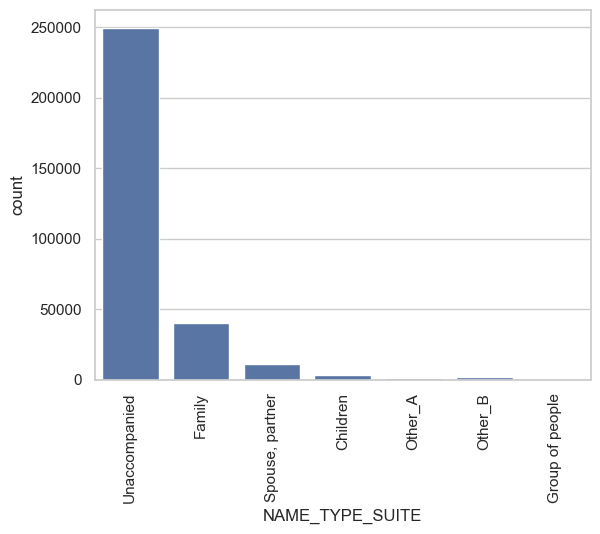

In [126]:
TypeSuite_vs_Total = sns.countplot(x="NAME_TYPE_SUITE",data =application_df)
TypeSuite_vs_Total.set_xticklabels(TypeSuite_vs_Total.get_xticklabels(),rotation=90)
plt.show()

In [127]:
test_df8=round((Univariate_defaulter_Cat_1_df["NAME_TYPE_SUITE"].value_counts()/application_df["NAME_TYPE_SUITE"].value_counts())*100,2)

test_df8 = pd.DataFrame(test_df8)

test_df8.reset_index(level=0, inplace=True)
test_df8.sort_values(by=["NAME_TYPE_SUITE"],ascending=False,inplace=True)

test_df8.rename(columns=  {"Default_Percentage": "NAME_TYPE_SUITE", 
                     "count":"Default_Percentage"}, 
                                  inplace = True) 


test_df8

NAME_TYPE_SUITE  Default_Percentage
0    Unaccompanied                8.17
2  Spouse, partner                7.87
4          Other_B                9.83
5          Other_A                8.78
6  Group of people                8.49
1           Family                7.49
3         Children                7.38

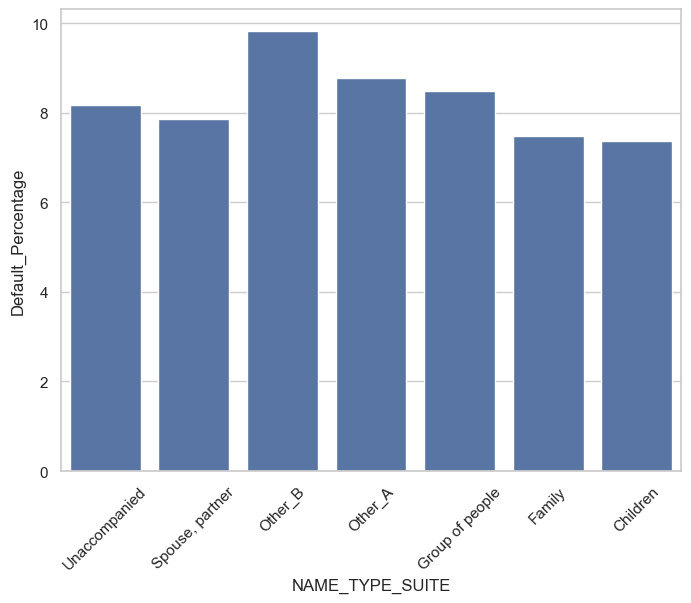

In [128]:
f, ax = plt.subplots(figsize=(8,6))
TypeSuite_vs_Target= sns.barplot(x="NAME_TYPE_SUITE",y="Default_Percentage",data=test_df8
                                         ,order=test_df8['NAME_TYPE_SUITE'])
TypeSuite_vs_Target.set_xticklabels(TypeSuite_vs_Target.get_xticklabels(), rotation=45)
TypeSuite_vs_Target
plt.show()

In [129]:
test_df9=round((Univariate_defaulter_Cat_1_df["ORGANIZATION_TYPE"].value_counts()/application_df["ORGANIZATION_TYPE"].value_counts())*100,2)

test_df9 = pd.DataFrame(test_df9)

test_df9.reset_index(level=0, inplace=True)
test_df9.sort_values(by=["ORGANIZATION_TYPE"],ascending=False,inplace=True)

test_df9.rename(columns=  {"Default_Percentage": "ORGANIZATION_TYPE", 
                     "count":"Default_Percentage"}, 
                                  inplace = True) 


test_df9

ORGANIZATION_TYPE  Default_Percentage
57                     XNA                5.40
56              University                4.90
55       Transport: type 4                9.28
54       Transport: type 3               15.75
53       Transport: type 2                7.80
52       Transport: type 1                4.48
51           Trade: type 7                9.45
50           Trade: type 6                4.60
49           Trade: type 5                6.12
48           Trade: type 4                3.12
47           Trade: type 3               10.34
46           Trade: type 2                7.00
45           Trade: type 1                8.91
44                 Telecom                7.63
43                Services                6.60
42           Self-employed               10.17
41     Security Ministries                4.86
40                Security                9.98
39                  School                5.91
38              Restaurant               11.71
37                Religion                5.88
36                 Realtor               10.61
35                  Postal                8.44
34                  Police                5.00
33                   Other                7.64
32                  Mobile                9.15
31                Military                5.13
30                Medicine                6.58
29          Legal Services                7.87
28            Kindergarten                7.03
27               Insurance                5.70
26        Industry: type 9                6.68
25        Industry: type 8               12.50
24        Industry: type 7                8.03
23        Industry: type 6                7.14
22        Industry: type 5                6.84
21        Industry: type 4               10.15
20        Industry: type 3               10.62
19        Industry: type 2                7.21
18       Industry: type 13               13.43
17       Industry: type 12                3.79
16       Industry: type 11                8.65
15       Industry: type 10                6.42
14        Industry: type 1               11.07
13                 Housing                7.94
12                   Hotel                6.42
11              Government                6.98
10               Emergency                7.14
9              Electricity                6.63
8                  Culture                5.54
7             Construction               11.68
6                 Cleaning               11.15
5   Business Entity Type 3                9.30
4   Business Entity Type 2                8.53
3   Business Entity Type 1                8.14
2                     Bank                5.19
1              Agriculture               10.47
0              Advertising                8.16

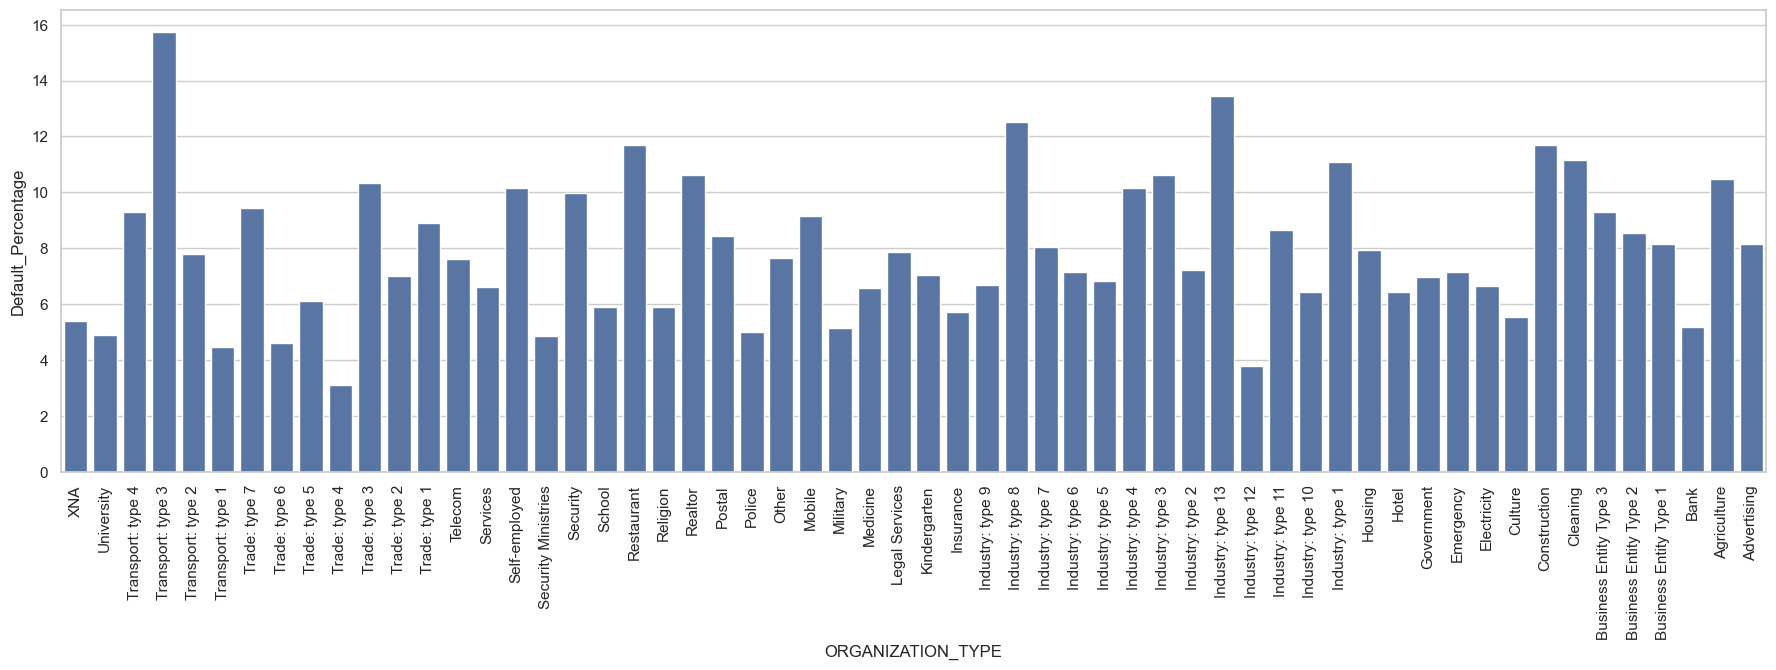

In [130]:
f, ax = plt.subplots(figsize=(22,6))
OrganizationType_vs_Target= sns.barplot(x="ORGANIZATION_TYPE",y="Default_Percentage",data=test_df9
                                         ,order=test_df9['ORGANIZATION_TYPE'])
OrganizationType_vs_Target.set_xticklabels(OrganizationType_vs_Target.get_xticklabels(), rotation=90)
OrganizationType_vs_Target
plt.show()

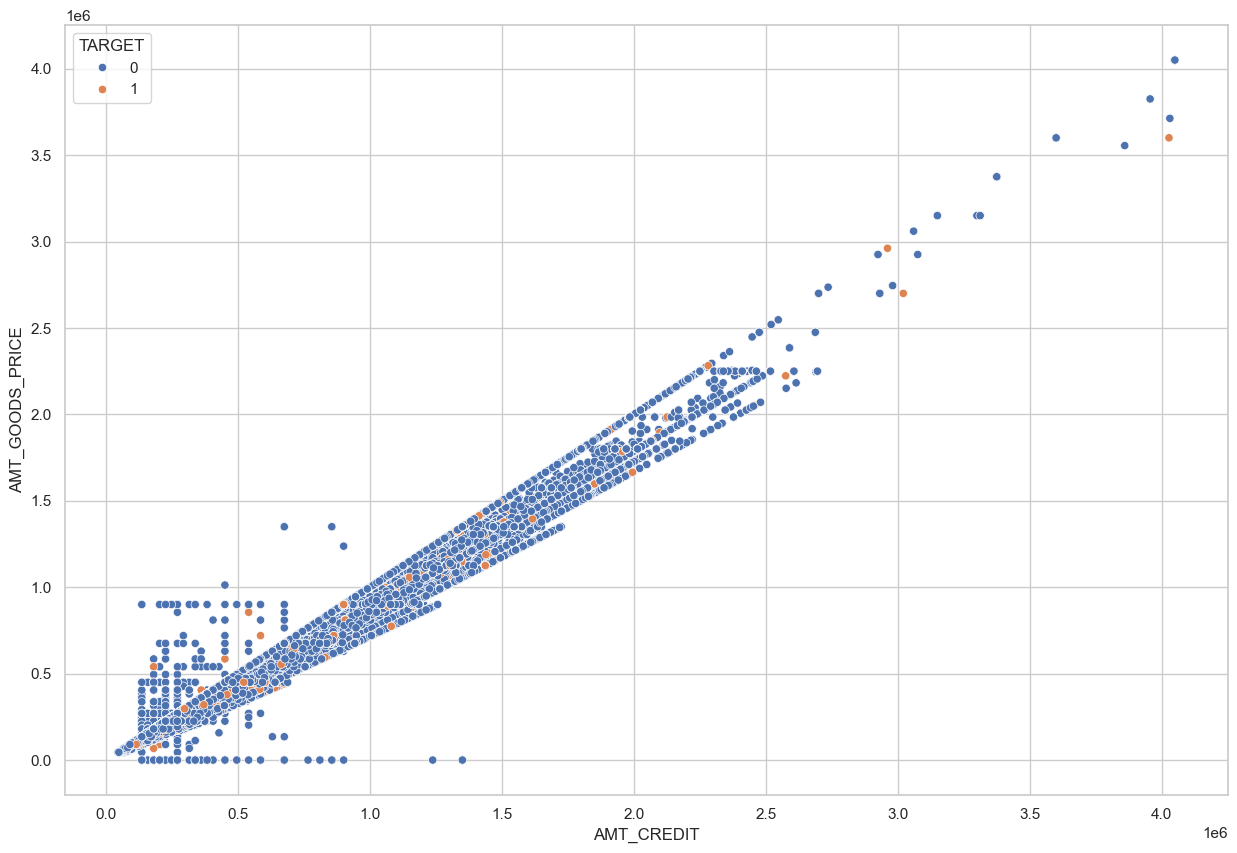

In [131]:
f, ax = plt.subplots(figsize=(15,10))
sns.scatterplot(x="AMT_CREDIT",y="AMT_GOODS_PRICE",data=application_df,hue="TARGET")
plt.show()

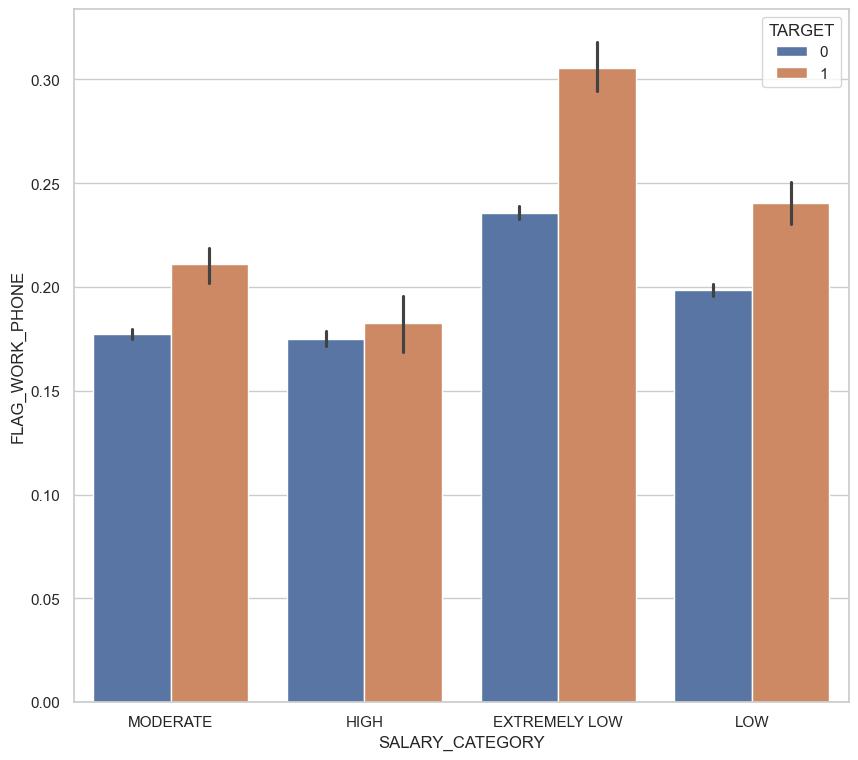

In [132]:
f, ax = plt.subplots(figsize=(10,9))
plot_1=sns.barplot(x="SALARY_CATEGORY",y="FLAG_WORK_PHONE",data=application_df,hue="TARGET")
plt.show()

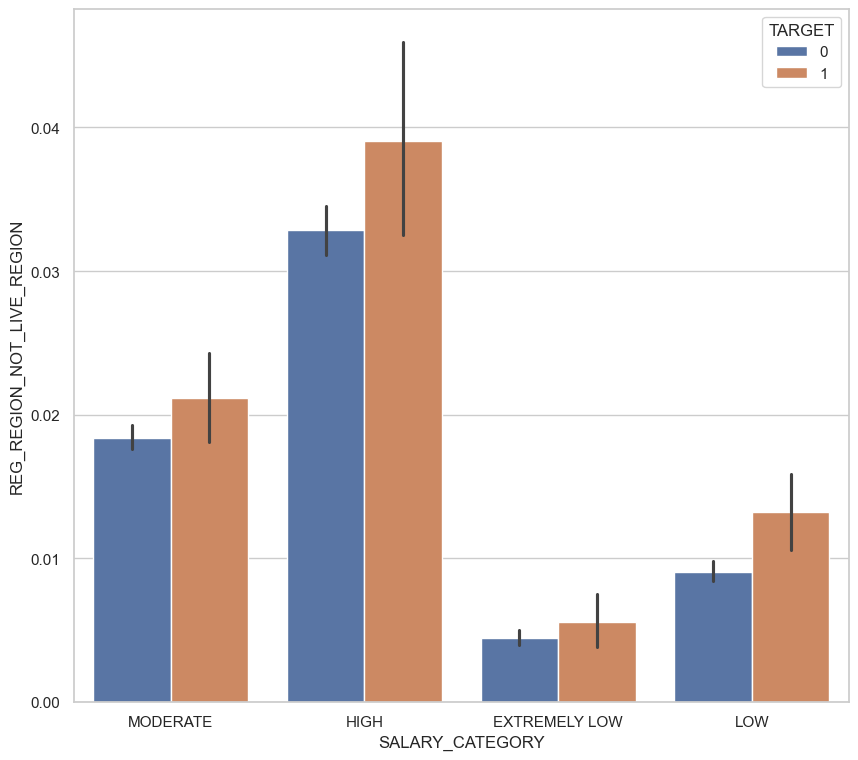

In [133]:
f, ax = plt.subplots(figsize=(10,9))
plot_1=sns.barplot(x="SALARY_CATEGORY",y="REG_REGION_NOT_LIVE_REGION",data=application_df,hue="TARGET")
plt.show()

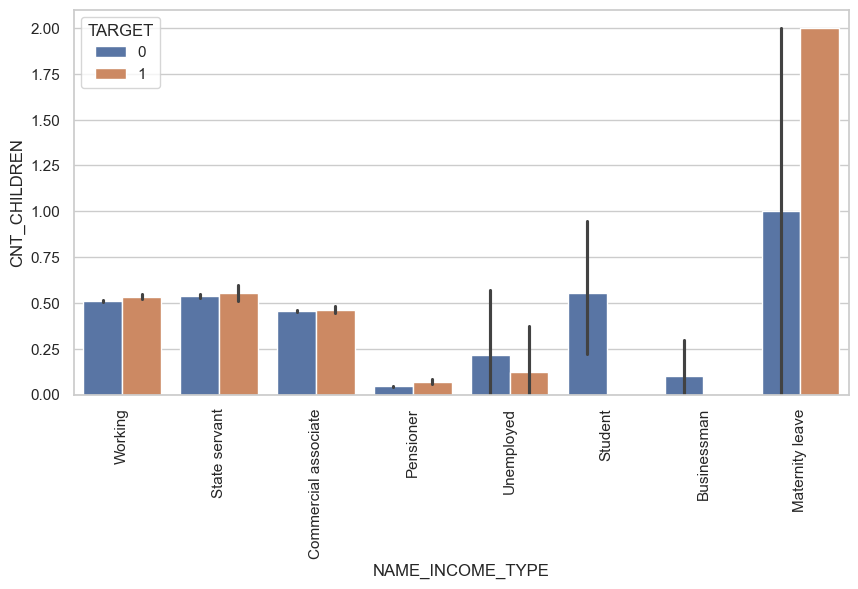

In [134]:
f, ax = plt.subplots(figsize=(10,5))
plot_1=sns.barplot(x="NAME_INCOME_TYPE",y="CNT_CHILDREN",data=application_df,hue="TARGET")
plot_1.set_xticklabels(plot_1.get_xticklabels(), rotation=90)
plt.show()

In [ ]:
#People who geting income via Maternity Leave tends to be more Defaulter when they have more children

In [ ]:
#Income vs No.of.FamilyMembers

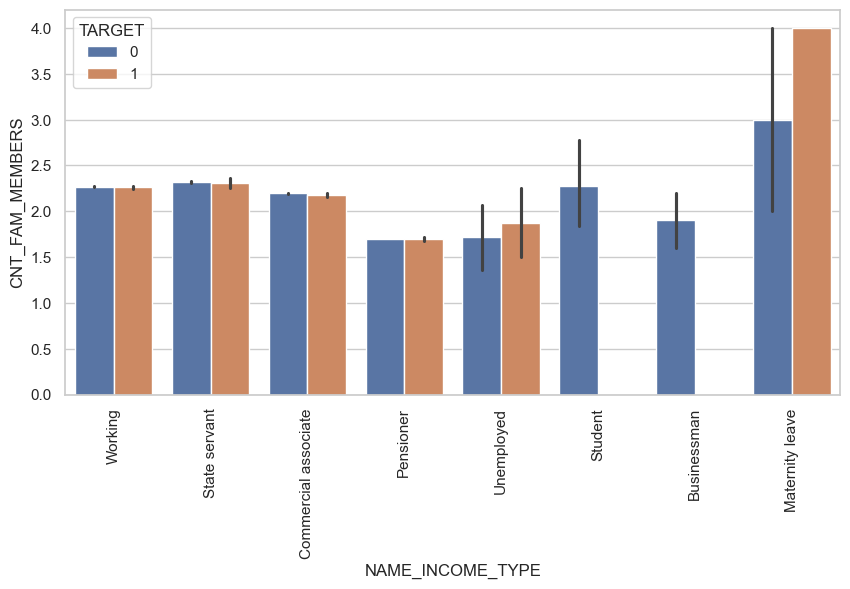

In [135]:
f, ax = plt.subplots(figsize=(10,5))
plot_1=sns.barplot(x="NAME_INCOME_TYPE",y="CNT_FAM_MEMBERS",data=application_df,hue="TARGET")
plot_1.set_xticklabels(plot_1.get_xticklabels(), rotation=90)
plt.show()

In [136]:
previous_application_df = pd.read_csv('previous_application.csv')
previous_application_df.head(5)

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

In [137]:
previous_application_df.shape

(1670214, 37)

In [138]:
previous_application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [139]:
100*previous_application_df.isnull().mean().sort_values(ascending=False)

RATE_INTEREST_PRIVILEGED       99.643698
RATE_INTEREST_PRIMARY          99.643698
AMT_DOWN_PAYMENT               53.636480
RATE_DOWN_PAYMENT              53.636480
NAME_TYPE_SUITE                49.119754
NFLAG_INSURED_ON_APPROVAL      40.298129
DAYS_TERMINATION               40.298129
DAYS_LAST_DUE                  40.298129
DAYS_LAST_DUE_1ST_VERSION      40.298129
DAYS_FIRST_DUE                 40.298129
DAYS_FIRST_DRAWING             40.298129
AMT_GOODS_PRICE                23.081773
AMT_ANNUITY                    22.286665
CNT_PAYMENT                    22.286366
PRODUCT_COMBINATION             0.020716
AMT_CREDIT                      0.000060
NAME_YIELD_GROUP                0.000000
NAME_PORTFOLIO                  0.000000
NAME_SELLER_INDUSTRY            0.000000
SELLERPLACE_AREA                0.000000
CHANNEL_TYPE                    0.000000
NAME_PRODUCT_TYPE               0.000000
SK_ID_PREV                      0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_CLIENT_TYPE

In [140]:
#deleting columns not needed for analysis
dropcol=['WEEKDAY_APPR_PROCESS_START', 'NAME_PRODUCT_TYPE','NAME_CASH_LOAN_PURPOSE', 'NAME_GOODS_CATEGORY','NAME_PAYMENT_TYPE','CODE_REJECT_REASON','HOUR_APPR_PROCESS_START','NFLAG_LAST_APPL_IN_DAY','DAYS_DECISION','SELLERPLACE_AREA']
previous_application_df.drop(axis=1, columns=dropcol, inplace=True)

In [141]:
previous_application_df.shape

(1670214, 27)

In [142]:
#writing the code to only keep columns having less than 50% (cutoff) null values
#Assumption: Cutoff of 50%
cut_off=50
cols_to_drop_prev = previous_application_df.columns[100*previous_application_df.isnull().mean()>cut_off]
print(cols_to_drop)
previous_application_df = previous_application_df.drop(cols_to_drop_prev, axis=1)

Index(['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG',
       'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG',
       'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG',
       'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMIN_MODE',
       'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI',
       'BASEMENTAREA_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI',
       'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI',
       'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI',
       'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE',
       'WALLSMATERIAL_MODE'],
      dtype='object')


In [143]:
100*previous_application_df.isnull().mean().sort_values(ascending=False)

NAME_TYPE_SUITE                49.119754
NFLAG_INSURED_ON_APPROVAL      40.298129
DAYS_TERMINATION               40.298129
DAYS_LAST_DUE                  40.298129
DAYS_LAST_DUE_1ST_VERSION      40.298129
DAYS_FIRST_DUE                 40.298129
DAYS_FIRST_DRAWING             40.298129
AMT_GOODS_PRICE                23.081773
AMT_ANNUITY                    22.286665
CNT_PAYMENT                    22.286366
PRODUCT_COMBINATION             0.020716
AMT_CREDIT                      0.000060
NAME_YIELD_GROUP                0.000000
SK_ID_PREV                      0.000000
NAME_SELLER_INDUSTRY            0.000000
CHANNEL_TYPE                    0.000000
SK_ID_CURR                      0.000000
NAME_CLIENT_TYPE                0.000000
NAME_CONTRACT_STATUS            0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
AMT_APPLICATION                 0.000000
NAME_CONTRACT_TYPE              0.000000
NAME_PORTFOLIO                  0.000000
dtype: float64

In [144]:
#As the other three columns null values much less tahn 1%, dropping the rows corresponding to null values
previous_application_df.dropna(subset=['AMT_CREDIT'], inplace=True)
previous_application_df.dropna(subset=['PRODUCT_COMBINATION'], inplace=True)
#As the DF is massive, deleting rows withy Null values for AMT_ANNUITY, AMT_GOODS_PRICE. We need these columns for 
#analysis as seen in application data frame and hence not deleting the columns
previous_application_df.dropna(subset=['AMT_ANNUITY'], inplace=True)
previous_application_df.dropna(subset=['AMT_GOODS_PRICE'], inplace=True)

In [145]:
previous_application_df.isnull().mean().sort_values(ascending=False)

NAME_TYPE_SUITE                0.326475
NFLAG_INSURED_ON_APPROVAL      0.233676
DAYS_TERMINATION               0.233676
DAYS_LAST_DUE                  0.233676
DAYS_LAST_DUE_1ST_VERSION      0.233676
DAYS_FIRST_DUE                 0.233676
DAYS_FIRST_DRAWING             0.233676
CHANNEL_TYPE                   0.000000
PRODUCT_COMBINATION            0.000000
NAME_YIELD_GROUP               0.000000
CNT_PAYMENT                    0.000000
NAME_SELLER_INDUSTRY           0.000000
SK_ID_PREV                     0.000000
SK_ID_CURR                     0.000000
NAME_CLIENT_TYPE               0.000000
NAME_CONTRACT_STATUS           0.000000
FLAG_LAST_APPL_PER_CONTRACT    0.000000
AMT_GOODS_PRICE                0.000000
AMT_CREDIT                     0.000000
AMT_APPLICATION                0.000000
AMT_ANNUITY                    0.000000
NAME_CONTRACT_TYPE             0.000000
NAME_PORTFOLIO                 0.000000
dtype: float64

In [146]:
#As these columns are required for analysis, deleting the corresponding rows and retaining the column

previous_application_df.dropna(subset=['NAME_TYPE_SUITE'], inplace=True)
previous_application_df.dropna(subset=['NFLAG_INSURED_ON_APPROVAL'], inplace=True)
previous_application_df.dropna(subset=['DAYS_LAST_DUE'], inplace=True)
previous_application_df.dropna(subset=['DAYS_FIRST_DUE'], inplace=True)
previous_application_df.dropna(subset=['DAYS_LAST_DUE_1ST_VERSION'], inplace=True)
previous_application_df.dropna(subset=['DAYS_FIRST_DRAWING'], inplace=True)
previous_application_df.dropna(subset=['DAYS_TERMINATION'], inplace=True)
previous_application_df.dropna(subset=['AMT_GOODS_PRICE'], inplace=True)
previous_application_df.dropna(subset=['DAYS_FIRST_DRAWING'], inplace=True)

In [147]:
previous_application_df.isnull().mean().sort_values(ascending=False)

SK_ID_PREV                     0.0
CHANNEL_TYPE                   0.0
DAYS_TERMINATION               0.0
DAYS_LAST_DUE                  0.0
DAYS_LAST_DUE_1ST_VERSION      0.0
DAYS_FIRST_DUE                 0.0
DAYS_FIRST_DRAWING             0.0
PRODUCT_COMBINATION            0.0
NAME_YIELD_GROUP               0.0
CNT_PAYMENT                    0.0
NAME_SELLER_INDUSTRY           0.0
NAME_PORTFOLIO                 0.0
SK_ID_CURR                     0.0
NAME_CLIENT_TYPE               0.0
NAME_TYPE_SUITE                0.0
NAME_CONTRACT_STATUS           0.0
FLAG_LAST_APPL_PER_CONTRACT    0.0
AMT_GOODS_PRICE                0.0
AMT_CREDIT                     0.0
AMT_APPLICATION                0.0
AMT_ANNUITY                    0.0
NAME_CONTRACT_TYPE             0.0
NFLAG_INSURED_ON_APPROVAL      0.0
dtype: float64

In [148]:
(previous_application_df.isnull().sum() * 100 / len(previous_application_df)).round(2)

SK_ID_PREV                     0.0
SK_ID_CURR                     0.0
NAME_CONTRACT_TYPE             0.0
AMT_ANNUITY                    0.0
AMT_APPLICATION                0.0
AMT_CREDIT                     0.0
AMT_GOODS_PRICE                0.0
FLAG_LAST_APPL_PER_CONTRACT    0.0
NAME_CONTRACT_STATUS           0.0
NAME_TYPE_SUITE                0.0
NAME_CLIENT_TYPE               0.0
NAME_PORTFOLIO                 0.0
CHANNEL_TYPE                   0.0
NAME_SELLER_INDUSTRY           0.0
CNT_PAYMENT                    0.0
NAME_YIELD_GROUP               0.0
PRODUCT_COMBINATION            0.0
DAYS_FIRST_DRAWING             0.0
DAYS_FIRST_DUE                 0.0
DAYS_LAST_DUE_1ST_VERSION      0.0
DAYS_LAST_DUE                  0.0
DAYS_TERMINATION               0.0
NFLAG_INSURED_ON_APPROVAL      0.0
dtype: float64

In [149]:
Contract_Status = previous_application_df['NAME_CONTRACT_STATUS']


In [151]:
#find the percentage of contract status 
df_1=round((Contract_Status.value_counts()/previous_application_df["NAME_CONTRACT_STATUS"].count())*100,2)
df_1 = pd.DataFrame(df_1)
df_1.reset_index(level=0, inplace=True)
df_1.rename(columns=  {"Percentage_of_Values": "NAME_CONTRACT_STATUS", 
                     "count":"Percentage_of_Values"}, 
                                 inplace = True) 
df_1.sort_values(by = 'Percentage_of_Values' , inplace = True, ascending = False)
df_1


NAME_CONTRACT_STATUS  Percentage_of_Values
0             Approved                 100.0

In [154]:
Client_Type = previous_application_df['NAME_CLIENT_TYPE']
#Client_Type

In [153]:
#find the percentage of contract status 
df_2=round((Client_Type.value_counts()/previous_application_df["NAME_CLIENT_TYPE"].count())*100,2)
df_2 = pd.DataFrame(df_2)
df_2.reset_index(level=0, inplace=True)
df_2.rename(columns=  {"index": "NAME_CLIENT_TYPE", 
                     "NAME_CLIENT_TYPE":"Percentage_of_Values"}, 
                                 inplace = True) 
df_2.sort_values(by = 'Percentage_of_Values' , inplace = True, ascending = False)
df_2

Percentage_of_Values  count
3                  XNA   0.06
0             Repeater  61.89
2            Refreshed   8.82
1                  New  29.22

In [155]:
previous_application_df.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NAME_CONTRACT_STATUS',
       'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE', 'NAME_PORTFOLIO', 'CHANNEL_TYPE',
       'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 'NAME_YIELD_GROUP',
       'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE',
       'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION',
       'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [156]:
Contract_Type = previous_application_df['NAME_CONTRACT_TYPE']
#Contract_Type

In [157]:
#find the percentage of contract status 
df_3=round((Contract_Type.value_counts()/previous_application_df["NAME_CONTRACT_TYPE"].count())*100,2)
df_3 = pd.DataFrame(df_3)
df_3.reset_index(level=0, inplace=True)
df_3.rename(columns=  {"index": "NAME_CONTRACT_TYPE", 
                     "NAME_CONTRACT_TYPE":"Percentage_of_Values"}, 
                                 inplace = True) 
df_3.sort_values(by = 'Percentage_of_Values' , inplace = True, ascending = False)
df_3

Percentage_of_Values  count
2      Revolving loans   5.54
0       Consumer loans  63.85
1           Cash loans  30.61

In [158]:
Seller_Industry= previous_application_df['NAME_SELLER_INDUSTRY']
#find the percentage of Goods Client applied for
df_12=round((Seller_Industry.value_counts()/previous_application_df["NAME_SELLER_INDUSTRY"].count())*100,2)
df_12 = pd.DataFrame(df_12)
df_12.reset_index(level=0, inplace=True)
df_12.rename(columns=  {"index": "NAME_SELLER_INDUSTRY", 
                     "NAME_SELLER_INDUSTRY":"Percentage_of_Values"}, 
                                 inplace = True) 
df_12.sort_values(by ='Percentage_of_Values', inplace = True, ascending = False)
df_12

Percentage_of_Values  count
1                    XNA  32.62
10               Tourism   0.05
9           MLM partners   0.07
8                Jewelry   0.20
6               Industry   1.36
3              Furniture   5.20
0   Consumer electronics  39.29
4           Construction   2.35
2           Connectivity  16.32
5               Clothing   2.19
7        Auto technology   0.35

In [159]:
Product_Combination= previous_application_df['PRODUCT_COMBINATION']
#find the percentage of Different Product Combinations
df_14=round((Product_Combination.value_counts()/previous_application_df["PRODUCT_COMBINATION"].count())*100,2)
df_14 = pd.DataFrame(df_14)
df_14.reset_index(level=0, inplace=True)
df_14.rename(columns=  {"Percentage_of_Values": "PRODUCT_COMBINATION", 
                     "count":"Percentage_of_Values"}, 
                                 inplace = True) 
df_14.sort_values(by ='Percentage_of_Values', inplace = True, ascending = False)
df_14

PRODUCT_COMBINATION  Percentage_of_Values
0      POS household with interest                 28.41
1         POS mobile with interest                 14.16
2              Cash X-Sell: middle                 11.11
3                 Cash X-Sell: low                  9.14
4   POS household without interest                  8.92
5       POS industry with interest                  8.72
6                Cash X-Sell: high                  4.07
7                Cash Street: high                  3.65
8                      Card X-Sell                  2.91
9                      Card Street                  2.63
10         POS other with interest                  1.71
11             Cash Street: middle                  1.42
12                Cash Street: low                  1.21
13   POS industry without interest                  1.08
14     POS mobile without interest                  0.73
15     POS others without interest                  0.12

In [160]:
#Highest product combination is POS household with interest

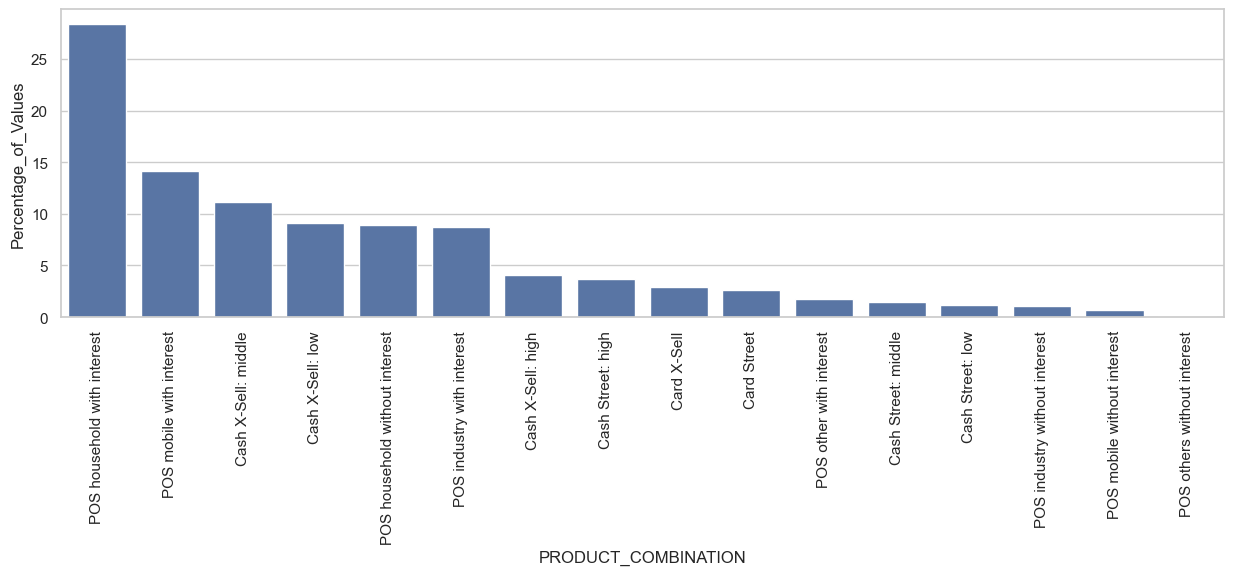

In [161]:
f, ax = plt.subplots(figsize=(15,4))
plot_2=sns.barplot(x="PRODUCT_COMBINATION",y="Percentage_of_Values",data=df_14)
plot_2.set_xticklabels(plot_2.get_xticklabels(), rotation=90)
plt.show()

In [162]:
previous_application_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 638335 entries, 1 to 1670213
Data columns (total 23 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_PREV                   638335 non-null  int64  
 1   SK_ID_CURR                   638335 non-null  int64  
 2   NAME_CONTRACT_TYPE           638335 non-null  object 
 3   AMT_ANNUITY                  638335 non-null  float64
 4   AMT_APPLICATION              638335 non-null  float64
 5   AMT_CREDIT                   638335 non-null  float64
 6   AMT_GOODS_PRICE              638335 non-null  float64
 7   FLAG_LAST_APPL_PER_CONTRACT  638335 non-null  object 
 8   NAME_CONTRACT_STATUS         638335 non-null  object 
 9   NAME_TYPE_SUITE              638335 non-null  object 
 10  NAME_CLIENT_TYPE             638335 non-null  object 
 11  NAME_PORTFOLIO               638335 non-null  object 
 12  CHANNEL_TYPE                 638335 non-null  object 
 13  NAM

In [163]:
num_cols = previous_application_df.describe().columns

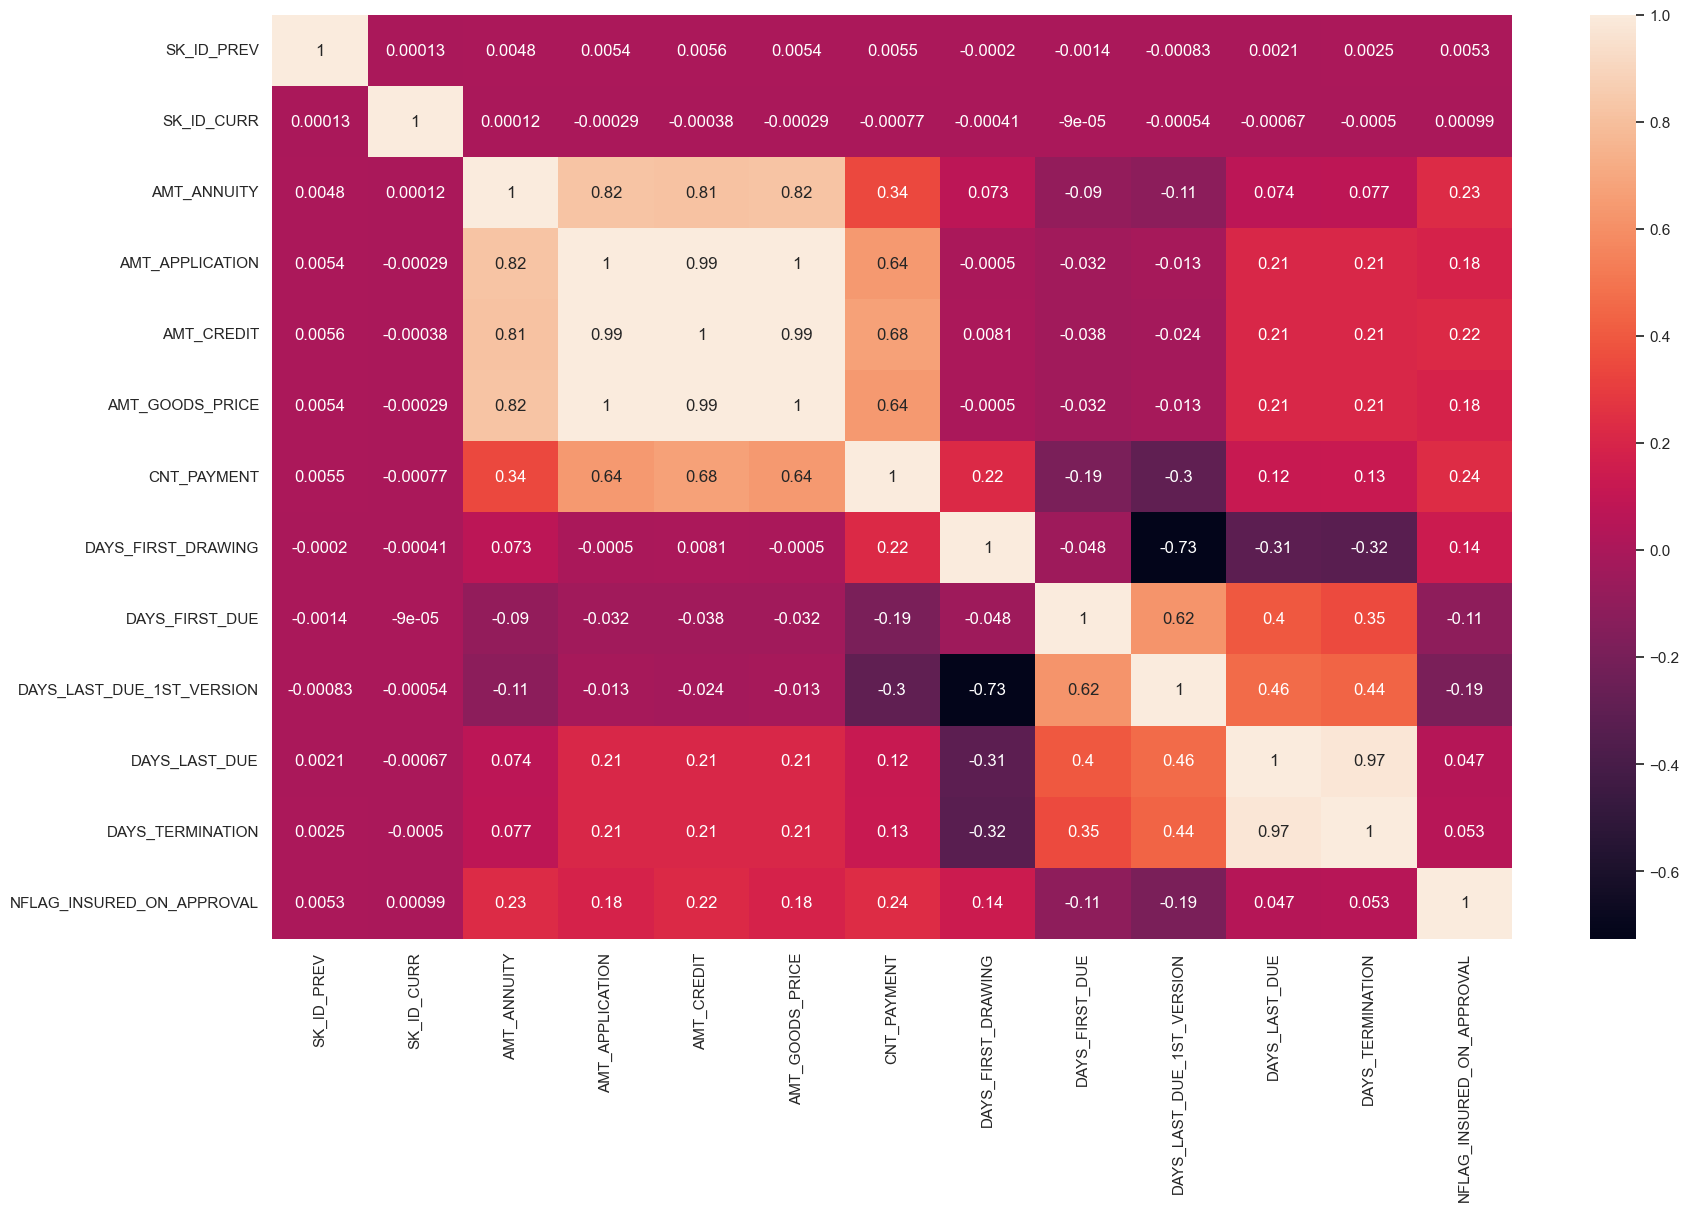

In [164]:
Correlation = previous_application_df[num_cols].corr()
#Correlation.sort_values(by=["TARGET"],ascendingb=False,inplace=True)
f, ax = plt.subplots(figsize=(20,12))
sns.heatmap(Correlation,annot=True)
plt.show()

In [ ]:
#AMT_ANNUITY,AMT_CREDIT,AMT_APPLICATION and AMT_GOODS_PRICE have high correlation

In [168]:
prev_current_app_df = pd.merge(previous_application_df,application_df,how="inner",on="SK_ID_CURR")
prev_current_app_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 542774 entries, 0 to 542773
Columns: 103 entries, SK_ID_PREV to SALARY_CATEGORY
dtypes: float64(37), int64(41), object(25)
memory usage: 426.5+ MB


In [171]:
#find the percentage of null values in each column, to determine what needs to be done as part of clean
(prev_current_app_df.isnull().sum() * 100 / len(prev_current_app_df)).round(2)

SK_ID_PREV                       0.00
SK_ID_CURR                       0.00
NAME_CONTRACT_TYPE_x             0.00
AMT_ANNUITY_x                    0.00
AMT_APPLICATION                  0.00
AMT_CREDIT_x                     0.00
AMT_GOODS_PRICE_x                0.00
FLAG_LAST_APPL_PER_CONTRACT      0.00
NAME_CONTRACT_STATUS             0.00
NAME_TYPE_SUITE_x                0.00
NAME_CLIENT_TYPE                 0.00
NAME_PORTFOLIO                   0.00
CHANNEL_TYPE                     0.00
NAME_SELLER_INDUSTRY             0.00
CNT_PAYMENT                      0.00
NAME_YIELD_GROUP                 0.00
PRODUCT_COMBINATION              0.00
DAYS_FIRST_DRAWING               0.00
DAYS_FIRST_DUE                   0.00
DAYS_LAST_DUE_1ST_VERSION        0.00
DAYS_LAST_DUE                    0.00
DAYS_TERMINATION                 0.00
NFLAG_INSURED_ON_APPROVAL        0.00
TARGET                           0.00
NAME_CONTRACT_TYPE_y             0.00
CODE_GENDER                      0.00
FLAG_OWN_CAR

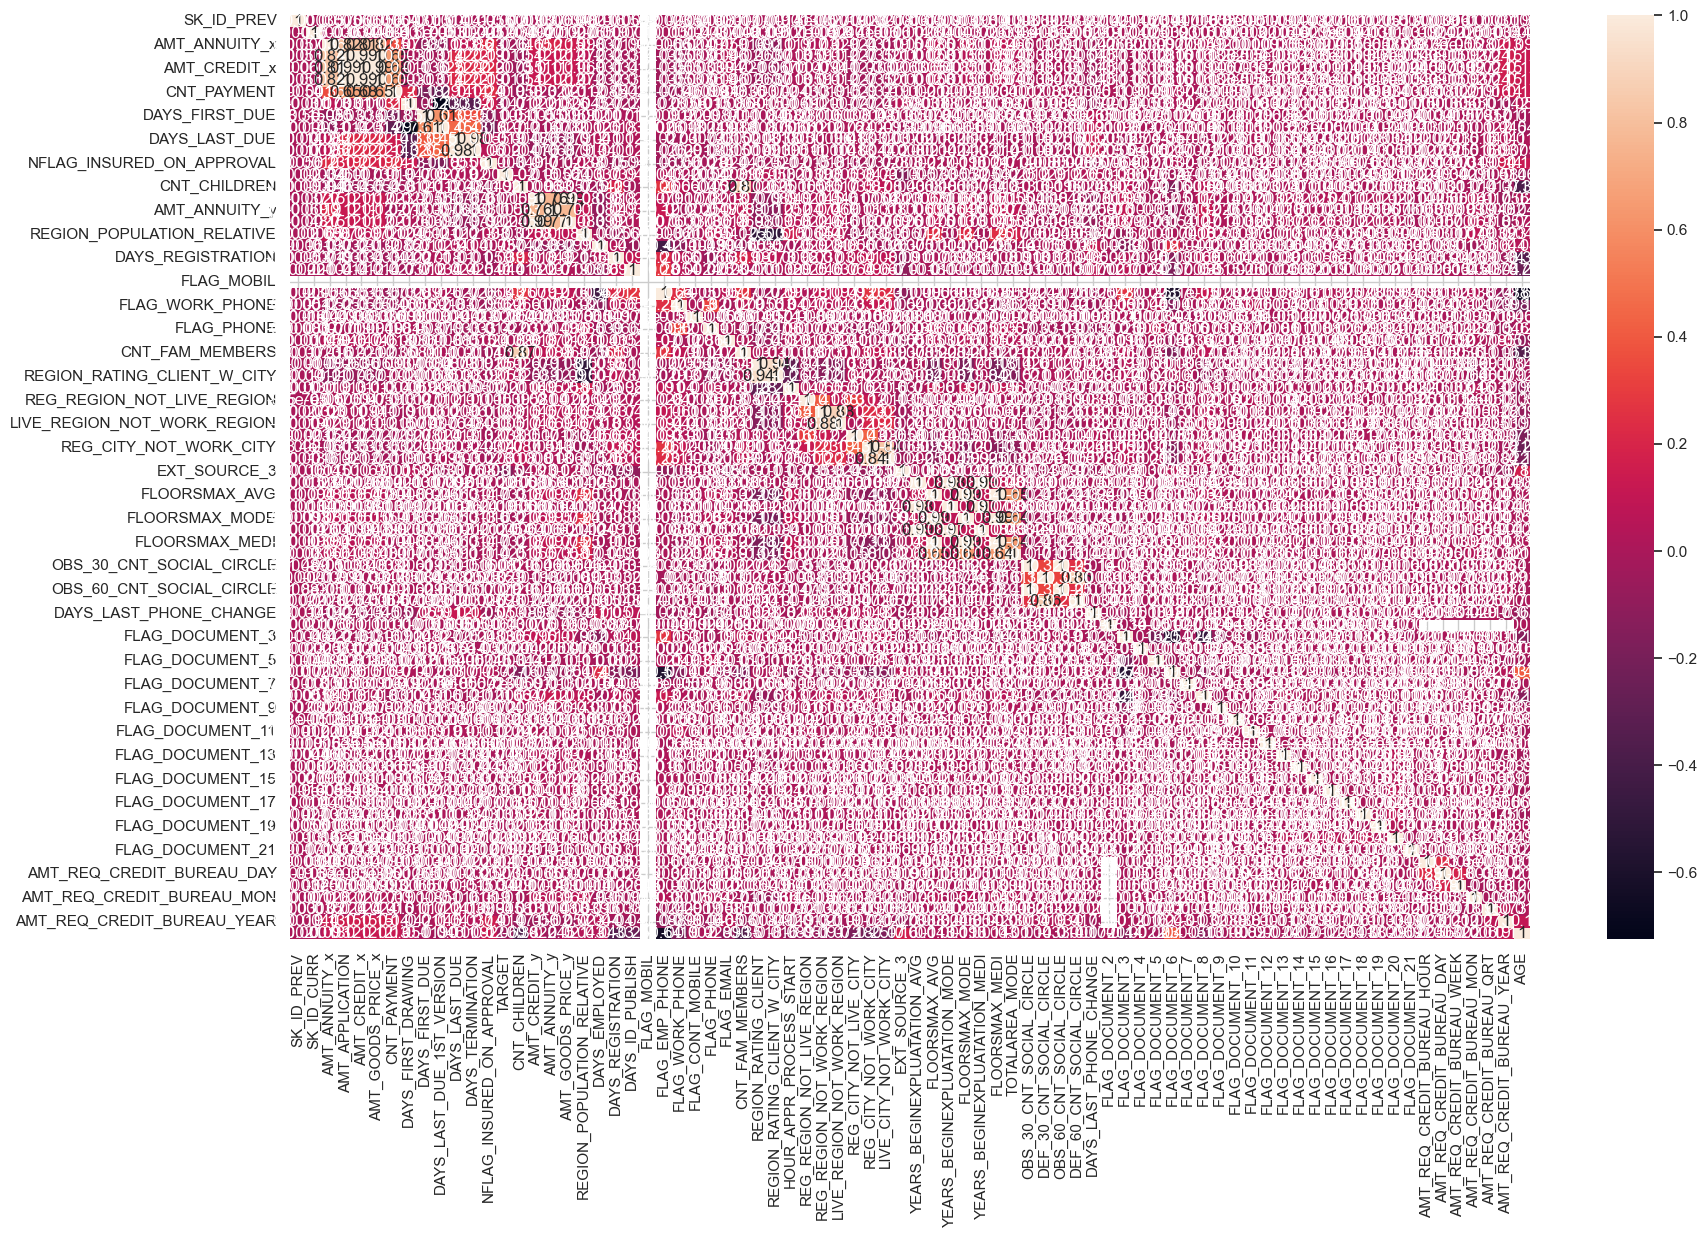

In [172]:
Correlation = prev_current_app_df[prev_current_app_df.describe().columns].corr()
#Correlation.sort_values(by=["TARGET"],ascending=False,inplace=True)
f, ax = plt.subplots(figsize=(20,12))
sns.heatmap(Correlation,annot=True)
plt.show()

In [173]:
Correlation.head(10)["TARGET"][1:]

SK_ID_CURR                  -0.000344
AMT_ANNUITY_x               -0.026347
AMT_APPLICATION             -0.011185
AMT_CREDIT_x                -0.007283
AMT_GOODS_PRICE_x           -0.011185
CNT_PAYMENT                  0.019037
DAYS_FIRST_DRAWING          -0.047421
DAYS_FIRST_DUE              -0.005020
DAYS_LAST_DUE_1ST_VERSION    0.026592
Name: TARGET, dtype: float64

In [174]:
Correlation.tail(10)["TARGET"][1:]

FLAG_DOCUMENT_20             -0.000924
FLAG_DOCUMENT_21             -0.000238
AMT_REQ_CREDIT_BUREAU_HOUR    0.001883
AMT_REQ_CREDIT_BUREAU_DAY     0.003382
AMT_REQ_CREDIT_BUREAU_WEEK   -0.002866
AMT_REQ_CREDIT_BUREAU_MON    -0.010276
AMT_REQ_CREDIT_BUREAU_QRT    -0.005820
AMT_REQ_CREDIT_BUREAU_YEAR    0.013803
AGE                          -0.068925
Name: TARGET, dtype: float64